### Checking environment

In [ ]:
!python --version
!conda --version
!which conda
!which python
!which jupyter
!which pip
!pip list

### List of dependencies

In [268]:
# dependencies
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

formats = f'%Y-%m-%d %H-%M-%S'

def resample_data(data, user, app):
    data_original = data.copy()
    data_original = data_original.set_index('time')
    data_original.reset_index(inplace=True)
    data_original['status'] = 'existing'
    data_original['user'] = user
    data_original['app'] = app

    data = data.set_index('time')
    data = data.resample('S').mean().interpolate()
    data.reset_index(inplace=True)
    data['status'] = 'resampled'
    data['user'] = user
    data['app'] = app
    data = data[~data['time'].isin(data_original['time'])]

    # data.to_csv(f'./{user}_{app}_resampled.csv', index=False)
    # data_original.to_csv(f'./{user}_{app}_original.csv', index=False)

    x = pd.concat([data_original, data])
    x = x.sort_values(by=['time'])
    x = x.reset_index(drop=True)

    # x.to_csv(f'./{user}_{app}_concat.csv', index=False)
    return x

### Dataframes timestamps of users entered and exited meetings

In [269]:
users = pd.read_csv('./csv_journal/bandwidth_timestamps.csv')
bandwidth_timestamps = pd.DataFrame(users)
users = bandwidth_timestamps['name'].unique()
bandwidth_timestamps

name       type gmeet_webcam_entered  gmeet_webcam_exited  \
0   presenter  presenter  2023-01-30 14:06:42  2023-01-30 14:32:59   
1    viewer_1     viewer  2023-01-30 14:08:36  2023-01-30 14:32:59   
2    viewer_2     viewer  2023-01-30 14:09:26  2023-01-30 14:32:59   
3    viewer_3     viewer  2023-01-30 14:10:25  2023-01-30 14:32:59   
4    viewer_4     viewer  2023-01-30 14:11:22  2023-01-30 14:32:59   
5    viewer_5     viewer  2023-01-30 14:12:19  2023-01-30 14:32:59   
6    viewer_6     viewer  2023-01-30 14:14:39  2023-01-30 14:32:59   
7    viewer_7     viewer  2023-01-30 14:14:42  2023-01-30 14:32:59   
8    viewer_8     viewer  2023-01-30 14:15:19  2023-01-30 14:32:59   
9    viewer_9     viewer  2023-01-30 14:16:26  2023-01-30 14:32:59   
10  viewer_10     viewer  2023-01-30 14:17:14  2023-01-30 14:32:59   
11  viewer_11     viewer  2023-01-30 14:18:20  2023-01-30 14:32:59   
12  viewer_12     viewer  2023-01-30 14:19:16  2023-01-30 14:32:59   
13  viewer_13     viewer  2023-01-30 14:20:15  2023-01-30 14:32:59   
14  viewer_14     viewer  2023-01-30 14:21:15  2023-01-30 14:32:59   
15  viewer_15     viewer  2023-01-30 14:22:17  2023-01-30 14:32:59   

   gmeet_screen_entered  gmeet_screen_exited  zoom_webcam_entered  \
0   2023-01-30 14:38:01  2023-01-30 15:06:53  2023-02-01 14:10:00   
1   2023-01-30 14:40:16  2023-01-30 15:06:53  2023-02-01 14:11:50   
2   2023-01-30 14:41:12  2023-01-30 15:06:53  2023-02-01 14:12:39   
3   2023-01-30 14:42:16  2023-01-30 15:06:53  2023-02-01 14:13:43   
4   2023-01-30 14:43:10  2023-01-30 15:06:53  2023-02-01 14:14:17   
5   2023-01-30 14:44:12  2023-01-30 15:06:53  2023-02-01 14:15:31   
6   2023-01-30 14:46:55  2023-01-30 15:06:53  2023-02-01 14:17:50   
7   2023-01-30 14:46:12  2023-01-30 15:06:53  2023-02-01 14:17:33   
8   2023-01-30 14:47:34  2023-01-30 15:06:53  2023-02-01 14:18:29   
9   2023-01-30 14:48:32  2023-01-30 15:06:53  2023-02-01 14:19:20   
10  2023-01-30 14:49:56  2023-01-30 15:06:53  2023-02-01 14:20:23   
11  2023-01-30 14:51:21  2023-01-30 15:06:53  2023-02-01 14:22:01   
12  2023-01-30 14:53:11  2023-01-30 15:06:53  2023-02-01 14:24:01   
13  2023-01-30 14:54:11  2023-01-30 15:06:53  2023-02-01 14:25:38   
14  2023-01-30 14:55:15  2023-01-30 15:06:53  2023-02-01 14:26:16   
15  2023-01-30 14:56:11  2023-01-30 15:06:53  2023-02-01 14:27:20   

     zoom_webcam_exited  zoom_screen_entered   zoom_screen_exited  \
0   2023-02-01 14:37:39  2023-02-01 14:40:00  2023-02-01 15:06:51   
1   2023-02-01 14:37:39  2023-02-01 14:41:14  2023-02-01 15:06:51   
2   2023-02-01 14:37:39  2023-02-01 14:42:19  2023-02-01 15:06:51   
3   2023-02-01 14:37:39  2023-02-01 14:43:15  2023-02-01 15:06:51   
4   2023-02-01 14:37:39  2023-02-01 14:44:22  2023-02-01 15:06:51   
5   2023-02-01 14:37:39  2023-02-01 14:45:14  2023-02-01 15:06:51   
6   2023-02-01 14:37:39  2023-02-01 14:47:47  2023-02-01 15:06:51   
7   2023-02-01 14:37:39  2023-02-01 14:47:26  2023-02-01 15:06:51   
8   2023-02-01 14:37:39  2023-02-01 14:48:20  2023-02-01 15:06:51   
9   2023-02-01 14:37:39  2023-02-01 14:49:16  2023-02-01 15:06:51   
10  2023-02-01 14:37:39  2023-02-01 14:50:11  2023-02-01 15:06:51   
11  2023-02-01 14:37:39  2023-02-01 14:51:22  2023-02-01 15:06:51   
12  2023-02-01 14:37:39  2023-02-01 14:52:13  2023-02-01 15:06:51   
13  2023-02-01 14:37:39  2023-02-01 14:53:15  2023-02-01 15:06:51   
14  2023-02-01 14:37:39  2023-02-01 14:54:12  2023-02-01 15:06:51   
15  2023-02-01 14:37:39  2023-02-01 14:55:13  2023-02-01 15:06:51   

   siruntu_webcam_entered siruntu_webcam_exited siruntu_screen_entered  \
0     2023-02-15 14:20:14   2023-02-15 14:48:00    2023-02-15 14:50:30   
1     2023-02-15 14:21:16   2023-02-15 14:48:00    2023-02-15 14:51:08   
2     2023-02-15 14:22:06   2023-02-15 14:48:00    2023-02-15 14:52:05   
3     2023-02-15 14:23:11   2023-02-15 14:48:00    2023-02-15 14:53:04   
4     2023-02-15 14:25:07   2023-02-15 14:48:00    2023-02-15 14:54:03   
5     2023-02-15 14:26:14 

### Client resources usage

#### Load files

In [270]:
# read csv file
bandwidth_df = pd.DataFrame()

for i in range(0, 16):
    name = i if i > 0 else 'presenter'
    folder = f'screenshots {str(name)}'
    filename_zoom = '2023-02-01-zoom.csv'
    filename_siruntu = '2023-02-15-siruntu.csv'
    path_zoom = f'./csv_journal/bandwidth/{folder}/{filename_zoom}'
    path_siruntu = f'./csv_journal/bandwidth/{folder}/{filename_siruntu}'

    df_zoom = pd.read_csv(path_zoom)
    df_siruntu = pd.read_csv(path_siruntu)

    # rename columns with lower case and replace space with underscore
    df_zoom.columns = df_zoom.columns.str.lower().str.replace(' ', '_')
    df_siruntu.columns = df_siruntu.columns.str.lower().str.replace(' ', '_')

    # add column to dataframe
    df_zoom['user'] = f'viewer_{str(name)}' if i > 0 else 'presenter'
    df_zoom['app'] = 'zoom'
    df_siruntu['user'] = f'viewer_{str(name)}' if i > 0 else 'presenter'
    df_siruntu['app'] = 'siruntu'

    # filter by column File that non contain NaN
    df_zoom = df_zoom[df_zoom['file'].notna()]
    df_siruntu = df_siruntu[df_siruntu['file'].notna()]

    # filter by column Protocol that contain string 'UDP'
    df_zoom = df_zoom[df_zoom['protocol'].str.contains('UDP')]
    df_siruntu = df_siruntu[df_siruntu['protocol'].str.contains('UDP')]

    # filter by column file that contain string 'chrome'
    df_zoom = df_zoom[df_zoom['file'].str.contains('chrome')]
    df_siruntu = df_siruntu[df_siruntu['file'].str.contains('chrome')]

    # convert to datetime
    df_zoom['time'] = pd.to_datetime(
        df_zoom['time'], format=formats)
    df_siruntu['time'] = pd.to_datetime(
        df_siruntu['time'], format=formats)

    # concatenate dataframe
    bandwidth_df = pd.concat([bandwidth_df, df_zoom, df_siruntu])

bandwidth_df

time             event      pid        file  \
314   2023-02-01 15:25:10  Data transferred  11588.0  chrome.exe   
322   2023-02-01 15:25:10  Data transferred  11588.0  chrome.exe   
335   2023-02-01 15:25:09  Data transferred  14264.0  chrome.exe   
345   2023-02-01 15:25:08  Data transferred  14264.0  chrome.exe   
358   2023-02-01 15:25:07  Data transferred  14264.0  chrome.exe   
...                   ...               ...      ...         ...   
23221 2023-02-15 13:53:41  Data transferred  11388.0  chrome.exe   
23228 2023-02-15 13:53:40  Data transferred  11388.0  chrome.exe   
23543 2023-02-15 13:51:45  Data transferred  11388.0  chrome.exe   
23552 2023-02-15 13:51:44  Data transferred  11388.0  chrome.exe   
23560 2023-02-15 13:51:43  Data transferred  11388.0  chrome.exe   

                                              directory   ip  port country  \
314          C:\Program Files\Google\Chrome\Application  NaN   NaN     NaN   
322          C:\Program Files\Google\Chrome\Application  NaN   NaN     NaN   
335          C:\Program Files\Google\Chrome\Application  NaN   NaN     NaN   
345          C:\Program Files\Google\Chrome\Application  NaN   NaN     NaN   
358          C:\Program Files\Google\Chrome\Application  NaN   NaN     NaN   
...                                                 ...  ...   ...     ...   
23221  C:\Program Files (x86)\Google\Chrome\Application  NaN   NaN     NaN   
23228  C:\Program Files (x86)\Google\Chrome\Application  NaN   NaN     NaN   
23543  C:\Program Files (x86)\Google\Chrome\Application  NaN   NaN     NaN   
23552  C:\Program Files (x86)\Google\Chrome\Application  NaN   NaN     NaN   
23560  C:\Program Files (x86)\Google\Chrome\Application  NaN   NaN     NaN   

       download_(bytes)  upload_(bytes) protocol       user      app  
314                 102             102      UDP  presenter     zoom  
322                 164             164      UDP  presenter     zoom  
335                   0             217      UDP  presenter     zoom  
345                   0             217      UDP  presenter     zoom  
358                   0             217      UDP  presenter     zoom  
...                 ...             ...      ...        ...      ...  
23221                 0             217      UDP  viewer_15  siruntu  
23228                 0             217      UDP  viewer_15  siruntu  
23543                 0             217      UDP  viewer_15  siruntu  
23552                 0             217      UDP  viewer_15  siruntu  
23560                 0             217      UDP  viewer_15  siruntu  

[111118 rows x 13 columns]

#### Segmented dataframes

In [271]:
zoom = bandwidth_df[bandwidth_df['app'] == 'zoom']
siruntu = bandwidth_df[bandwidth_df['app'] == 'siruntu']

zoom = zoom.groupby(['time', 'user']).sum()
siruntu = siruntu.groupby(['time', 'user']).sum()

# drop column pid and port
zoom = zoom.drop(['pid', 'port'], axis=1)
siruntu = siruntu.drop(['pid', 'port'], axis=1)

zoom = zoom.reset_index()
siruntu = siruntu.reset_index()

zoom['app'] = 'zoom'
siruntu['app'] = 'siruntu'

/tmp/ipykernel_553911/3435262170.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  zoom = zoom.groupby(['time', 'user']).sum()
/tmp/ipykernel_553911/3435262170.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  siruntu = siruntu.groupby(['time', 'user']).sum()


In [272]:


zoom_presenter = zoom[zoom['user'] == 'presenter']
zoom_viewer_1 = zoom[zoom['user'] == 'viewer_1']
zoom_viewer_2 = zoom[zoom['user'] == 'viewer_2']
zoom_viewer_3 = zoom[zoom['user'] == 'viewer_3']
zoom_viewer_4 = zoom[zoom['user'] == 'viewer_4']
zoom_viewer_5 = zoom[zoom['user'] == 'viewer_5']
zoom_viewer_6 = zoom[zoom['user'] == 'viewer_6']
zoom_viewer_7 = zoom[zoom['user'] == 'viewer_7']
zoom_viewer_8 = zoom[zoom['user'] == 'viewer_8']
zoom_viewer_9 = zoom[zoom['user'] == 'viewer_9']
zoom_viewer_10 = zoom[zoom['user'] == 'viewer_10']
zoom_viewer_11 = zoom[zoom['user'] == 'viewer_11']
zoom_viewer_12 = zoom[zoom['user'] == 'viewer_12']
zoom_viewer_13 = zoom[zoom['user'] == 'viewer_13']
zoom_viewer_14 = zoom[zoom['user'] == 'viewer_14']
zoom_viewer_15 = zoom[zoom['user'] == 'viewer_15']

siruntu_presenter = siruntu[siruntu['user'] == 'presenter']
siruntu_viewer_1 = siruntu[siruntu['user'] == 'viewer_1']
siruntu_viewer_2 = siruntu[siruntu['user'] == 'viewer_2']
siruntu_viewer_3 = siruntu[siruntu['user'] == 'viewer_3']
siruntu_viewer_4 = siruntu[siruntu['user'] == 'viewer_4']
siruntu_viewer_5 = siruntu[siruntu['user'] == 'viewer_5']
siruntu_viewer_6 = siruntu[siruntu['user'] == 'viewer_6']
siruntu_viewer_7 = siruntu[siruntu['user'] == 'viewer_7']
siruntu_viewer_8 = siruntu[siruntu['user'] == 'viewer_8']
siruntu_viewer_9 = siruntu[siruntu['user'] == 'viewer_9']
siruntu_viewer_10 = siruntu[siruntu['user'] == 'viewer_10']
siruntu_viewer_11 = siruntu[siruntu['user'] == 'viewer_11']
siruntu_viewer_12 = siruntu[siruntu['user'] == 'viewer_12']
siruntu_viewer_13 = siruntu[siruntu['user'] == 'viewer_13']
siruntu_viewer_14 = siruntu[siruntu['user'] == 'viewer_14']
siruntu_viewer_15 = siruntu[siruntu['user'] == 'viewer_15']

zoom_presenter = resample_data(zoom_presenter, 'presenter', 'zoom')
zoom_viewer_1 = resample_data(zoom_viewer_1, 'viewer_1', 'zoom')
zoom_viewer_2 = resample_data(zoom_viewer_2, 'viewer_2', 'zoom')
zoom_viewer_3 = resample_data(zoom_viewer_3, 'viewer_3', 'zoom')
zoom_viewer_4 = resample_data(zoom_viewer_4, 'viewer_4', 'zoom')
zoom_viewer_5 = resample_data(zoom_viewer_5, 'viewer_5', 'zoom')
zoom_viewer_6 = resample_data(zoom_viewer_6, 'viewer_6', 'zoom')
zoom_viewer_7 = resample_data(zoom_viewer_7, 'viewer_7', 'zoom')
zoom_viewer_8 = resample_data(zoom_viewer_8, 'viewer_8', 'zoom')
zoom_viewer_9 = resample_data(zoom_viewer_9, 'viewer_9', 'zoom')
zoom_viewer_10 = resample_data(zoom_viewer_10, 'viewer_10', 'zoom')
zoom_viewer_11 = resample_data(zoom_viewer_11, 'viewer_11', 'zoom')
zoom_viewer_12 = resample_data(zoom_viewer_12, 'viewer_12', 'zoom')
zoom_viewer_13 = resample_data(zoom_viewer_13, 'viewer_13', 'zoom')
zoom_viewer_14 = resample_data(zoom_viewer_14, 'viewer_14', 'zoom')
zoom_viewer_15 = resample_data(zoom_viewer_15, 'viewer_15', 'zoom')

siruntu_presenter = resample_data(siruntu_presenter, 'presenter', 'siruntu')
siruntu_viewer_1 = resample_data(siruntu_viewer_1, 'viewer_1', 'siruntu')
siruntu_viewer_2 = resample_data(siruntu_viewer_2, 'viewer_2', 'siruntu')
siruntu_viewer_3 = resample_data(siruntu_viewer_3, 'viewer_3', 'siruntu')
siruntu_viewer_4 = resample_data(siruntu_viewer_4, 'viewer_4', 'siruntu')
siruntu_viewer_5 = resample_data(siruntu_viewer_5, 'viewer_5', 'siruntu')
siruntu_viewer_6 = resample_data(siruntu_viewer_6, 'viewer_6', 'siruntu')
siruntu_viewer_7 = resample_data(siruntu_viewer_7, 'viewer_7', 'siruntu')
siruntu_viewer_8 = resample_data(siruntu_viewer_8, 'viewer_8', 'siruntu')
siruntu_viewer_9 = resample_data(siruntu_viewer_9, 'viewer_9', 'siruntu')
siruntu_viewer_10 = resample_data(siruntu_viewer_10, 'viewer_10', 'siruntu')
siruntu_viewer_11 = resample_data(siruntu_viewer_11, 'viewer_11', 'siruntu')
siruntu_viewer_12 = resample_data(siruntu_viewer_12, 'viewer_12', 'siruntu')
siruntu_viewer_13 = resample_data(siruntu_viewer_13, 'viewer_13', 'siruntu')
siruntu_viewer_14 = resample_data(siruntu_viewer_14, 'viewer_14', 'siruntu')
siruntu_viewer_15 = resample_data(siruntu_viewer_15, 'viewer_15', 'siruntu')

# concatenate dataframe
zoom_resampled = pd.concat([zoom_presenter, zoom_viewer_1, zoom_viewer_2, zoom_viewer_3, zoom_viewer_4, zoom_viewer_5, zoom_viewer_6, zoom_viewer_7, zoom_viewer_8, zoom_viewer_9, zoom_viewer_10, zoom_viewer_11, zoom_viewer_12, zoom_viewer_13, zoom_viewer_14, zoom_viewer_15])

siruntu_resampled = pd.concat([siruntu_presenter, siruntu_viewer_1, siruntu_viewer_2, siruntu_viewer_3, siruntu_viewer_4, siruntu_viewer_5, siruntu_viewer_6, siruntu_viewer_7, siruntu_viewer_8, siruntu_viewer_9, siruntu_viewer_10, siruntu_viewer_11, siruntu_viewer_12, siruntu_viewer_13, siruntu_viewer_14, siruntu_viewer_15])

/tmp/ipykernel_553911/3640989506.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('S').mean().interpolate()
/tmp/ipykernel_553911/3640989506.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('S').mean().interpolate()
/tmp/ipykernel_553911/3640989506.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('S').mean().interpolate()
/tmp/ipykernel_553911/

#### Throughput (download and upload) in client side

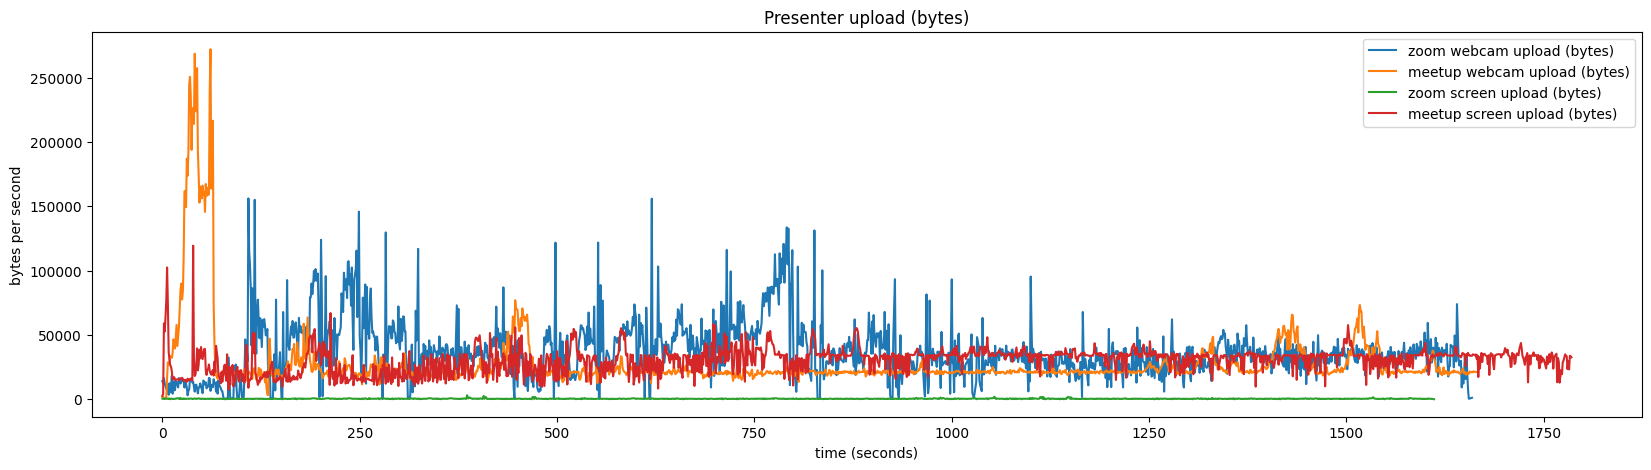

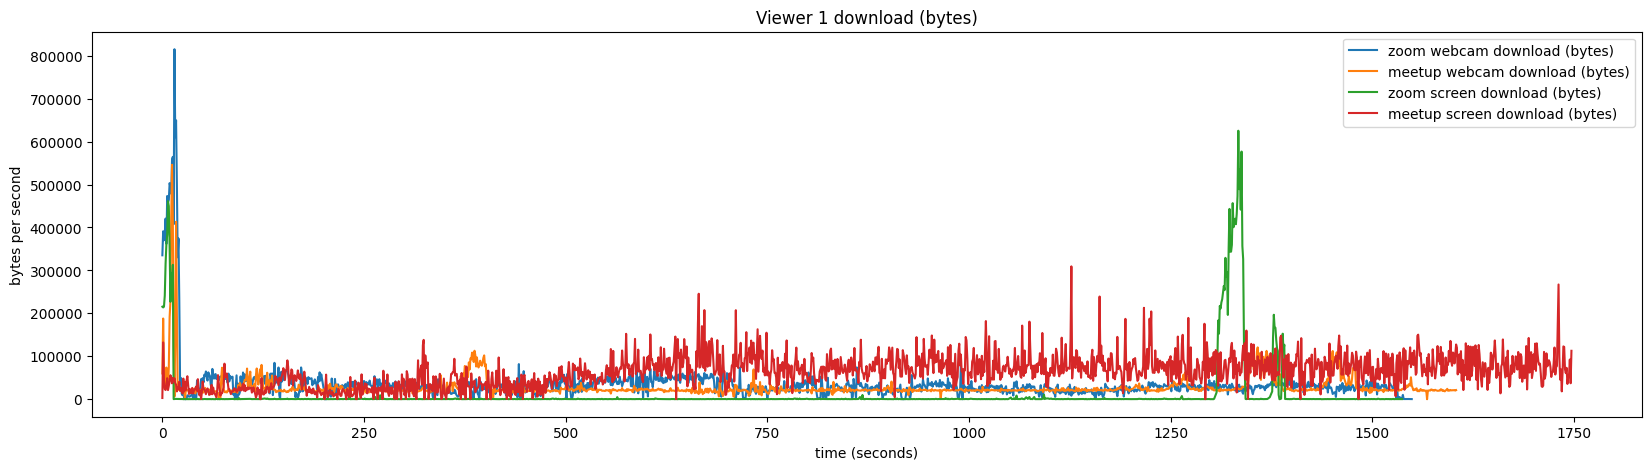

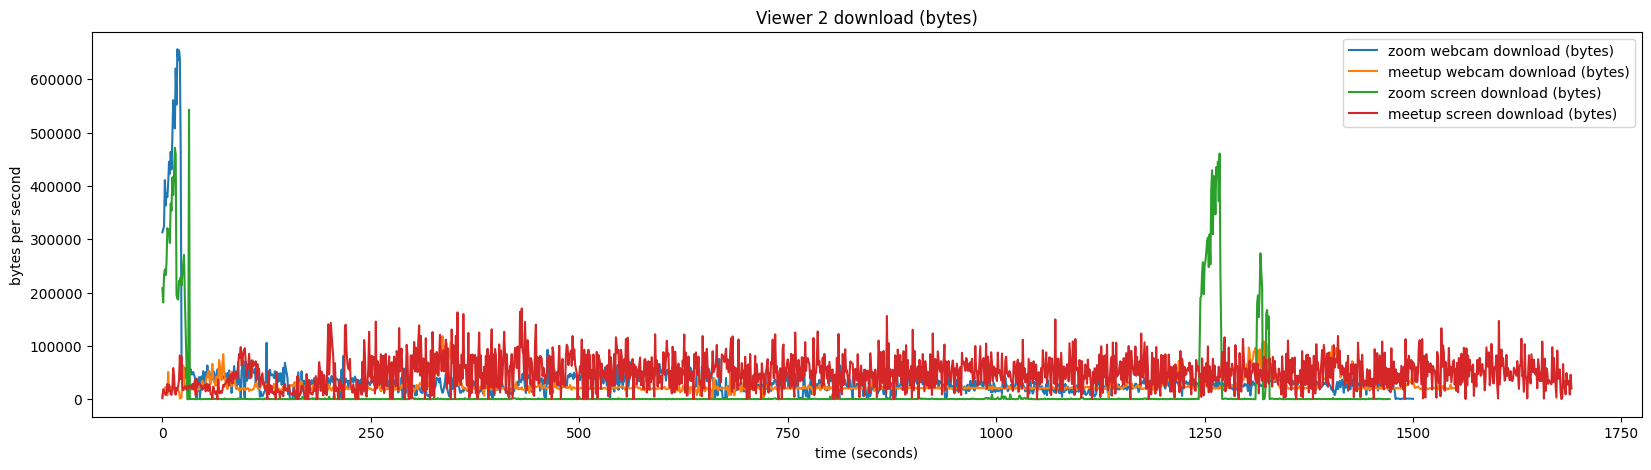

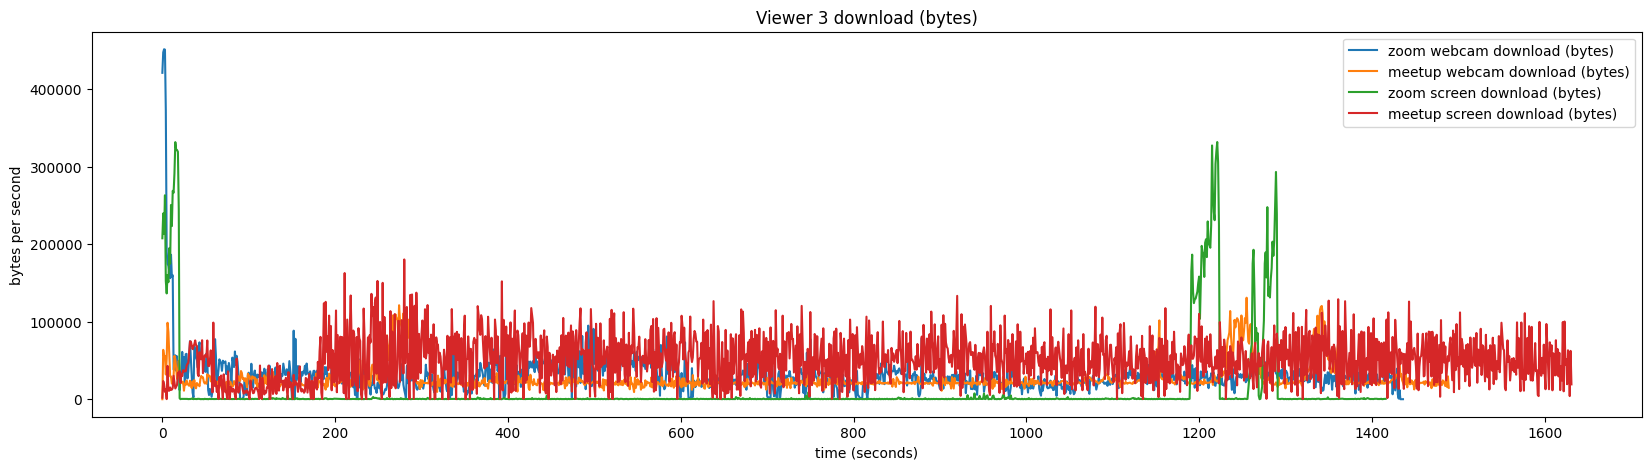

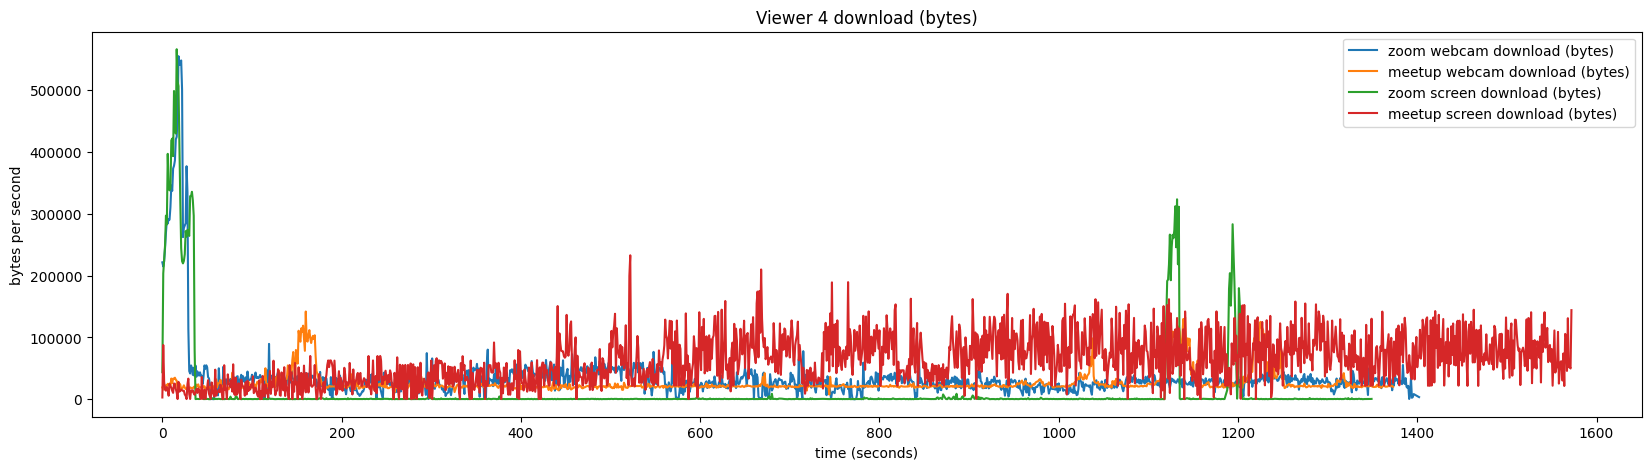

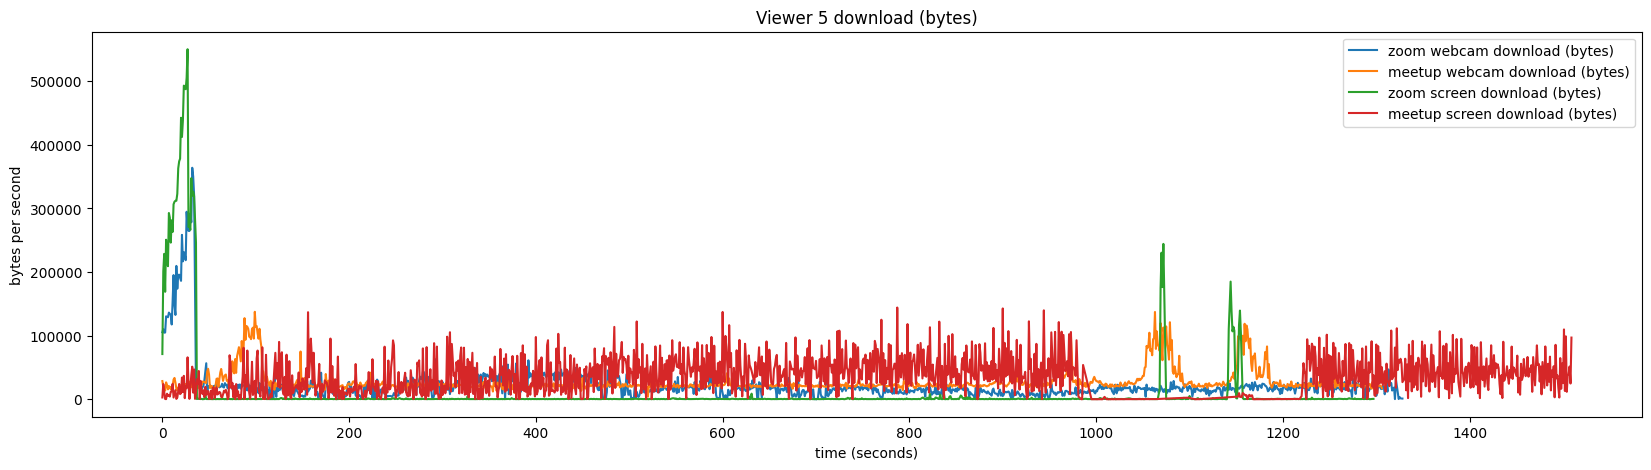

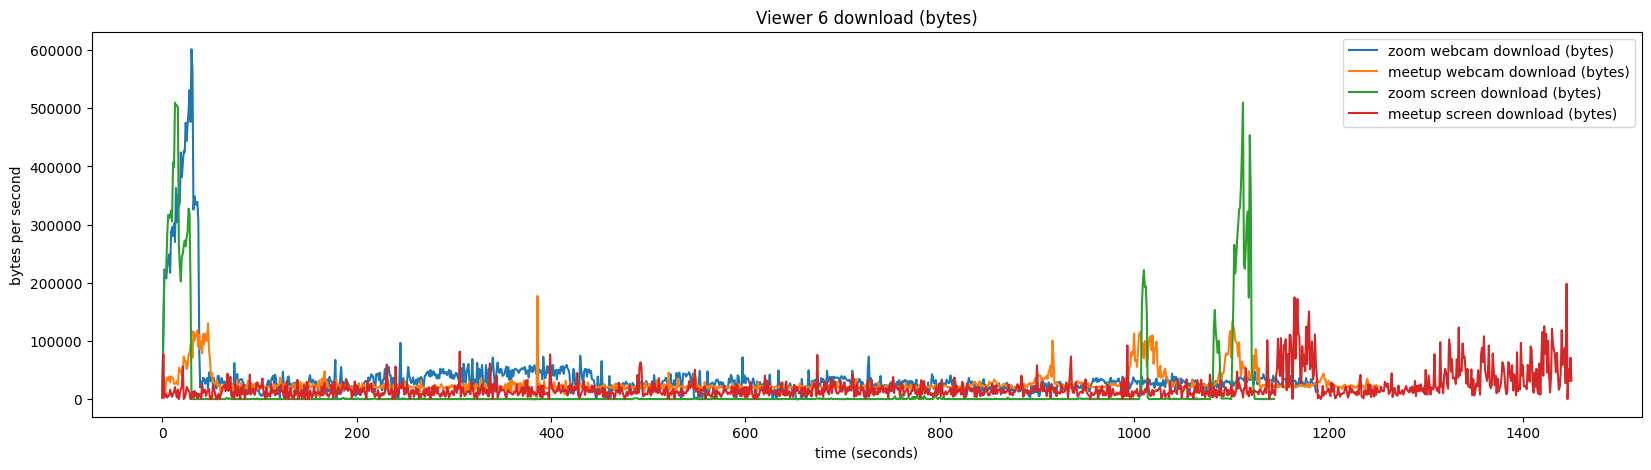

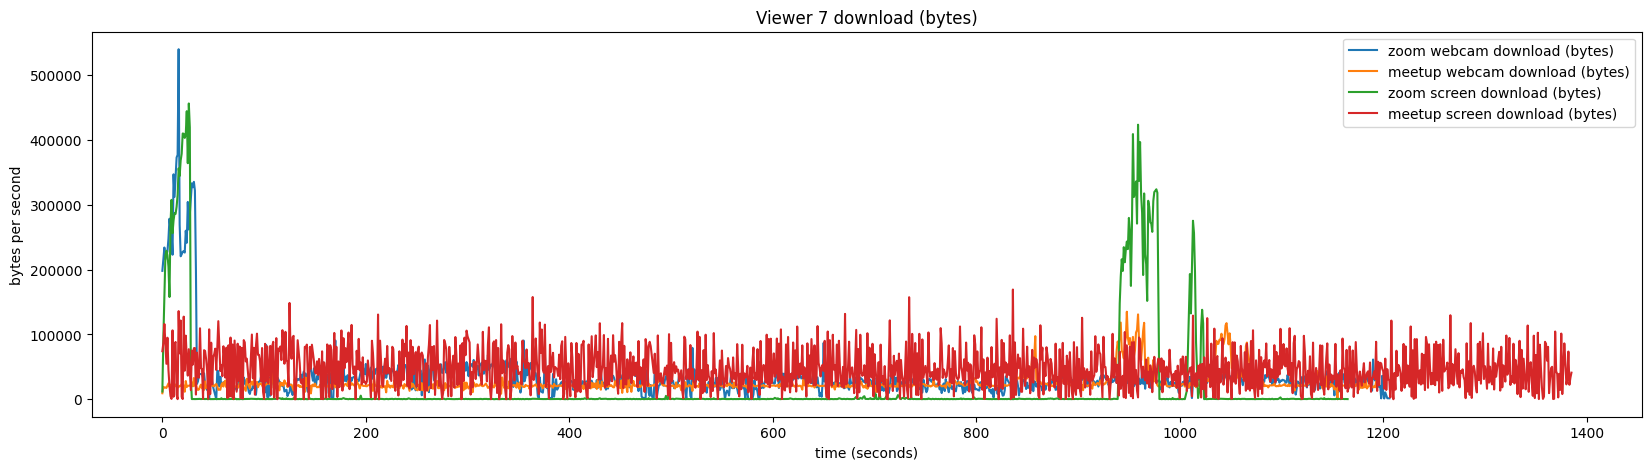

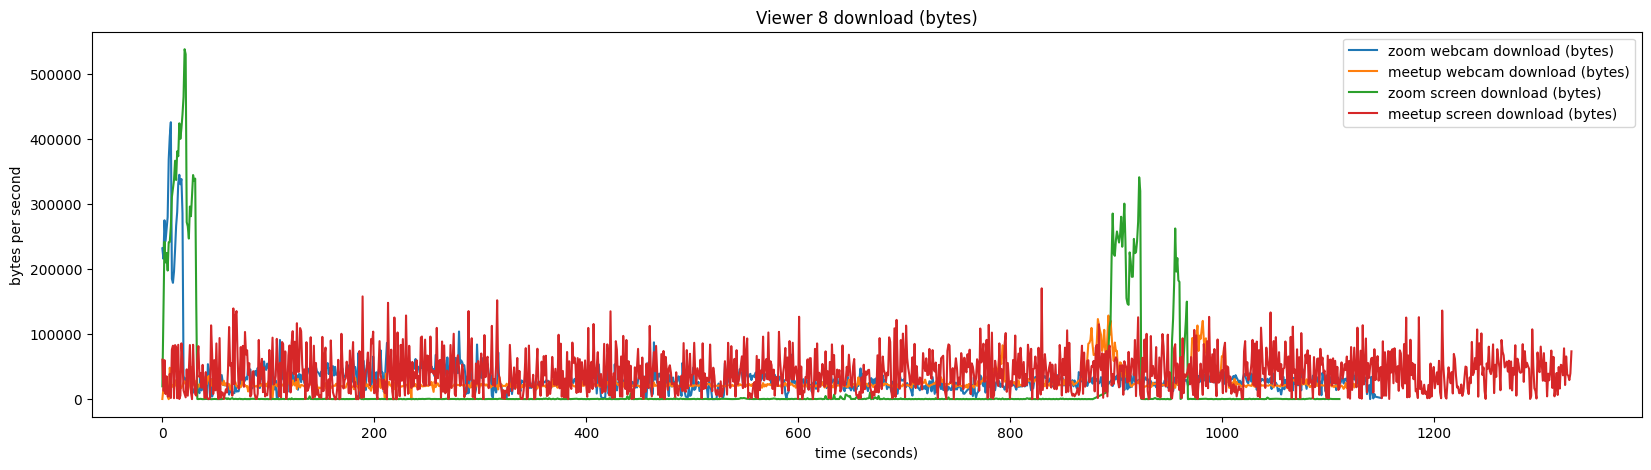

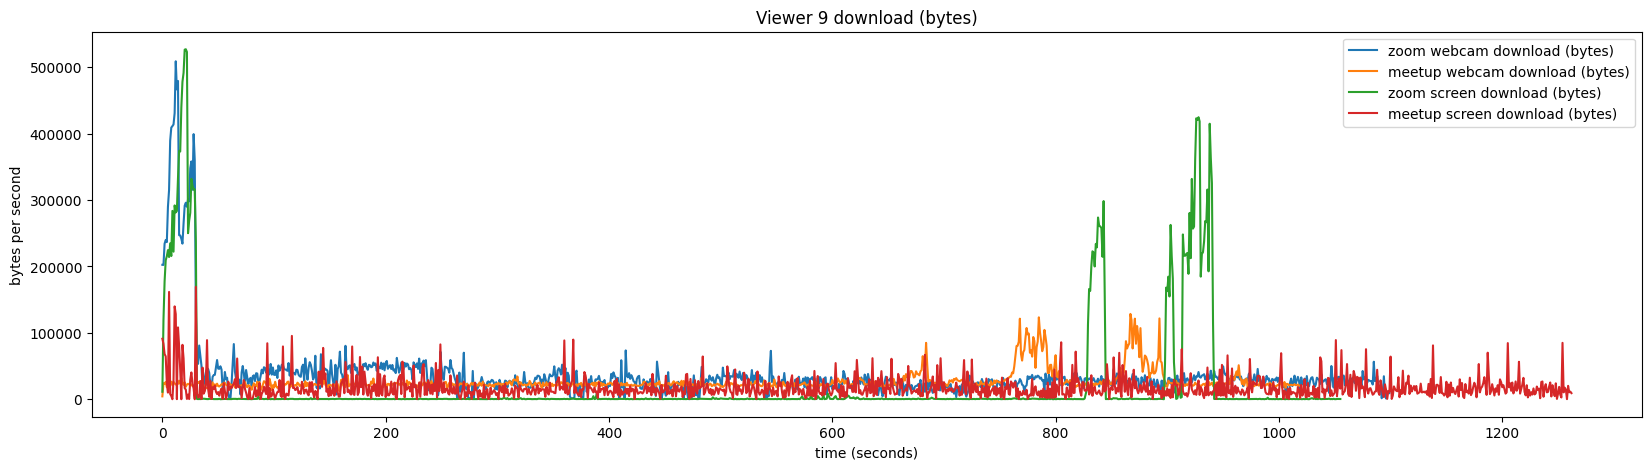

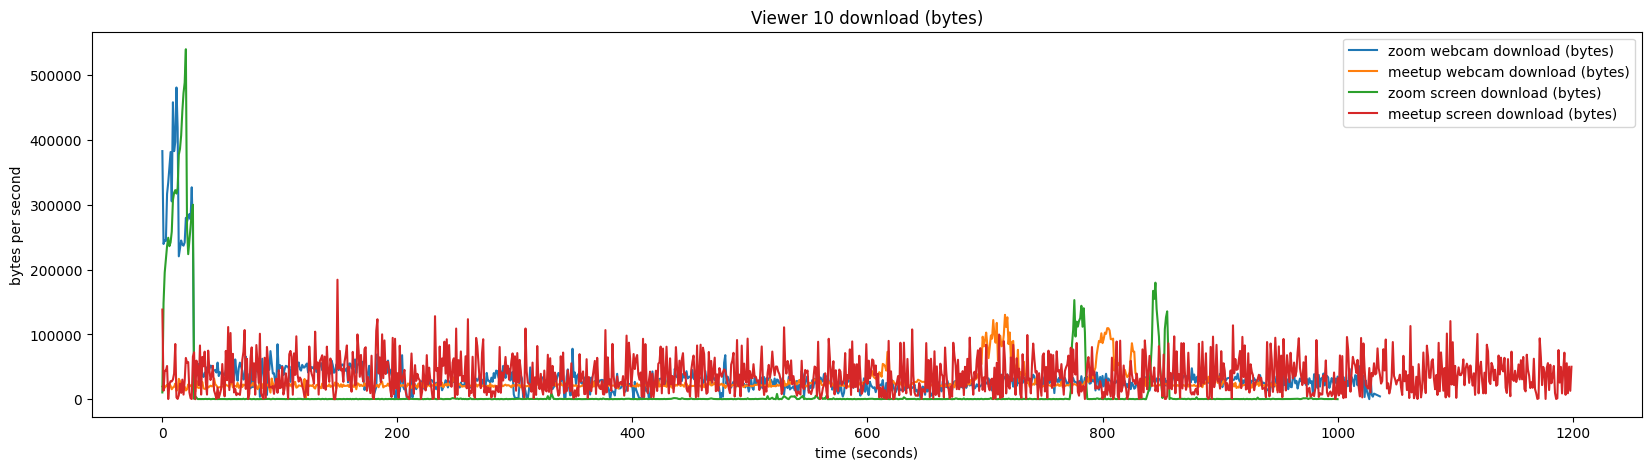

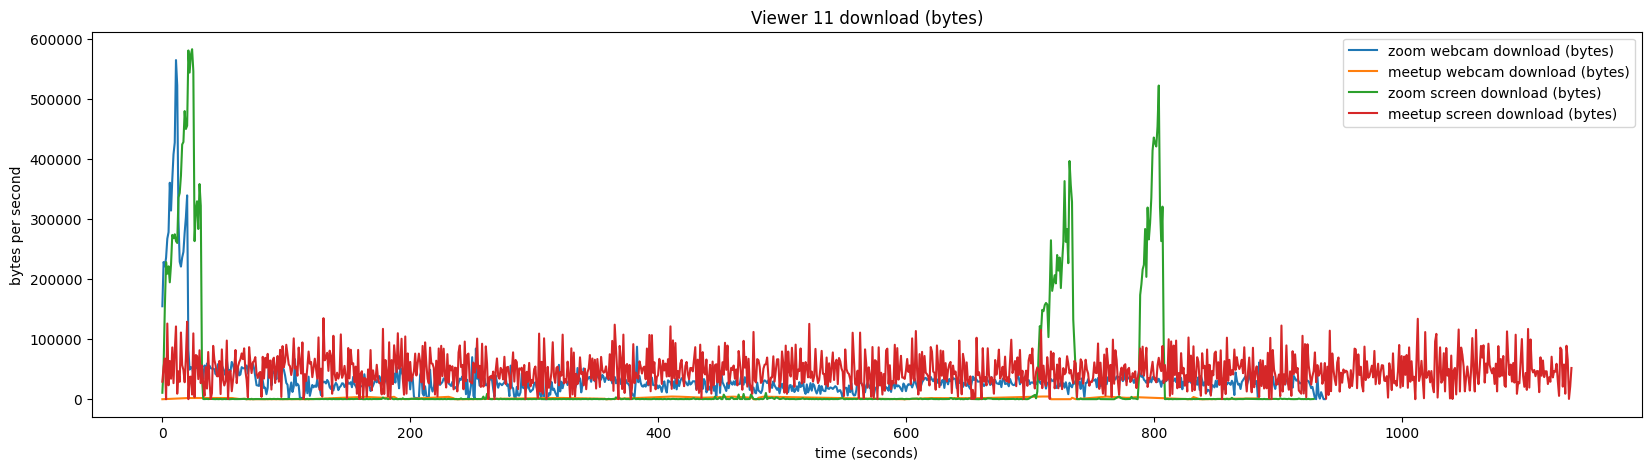

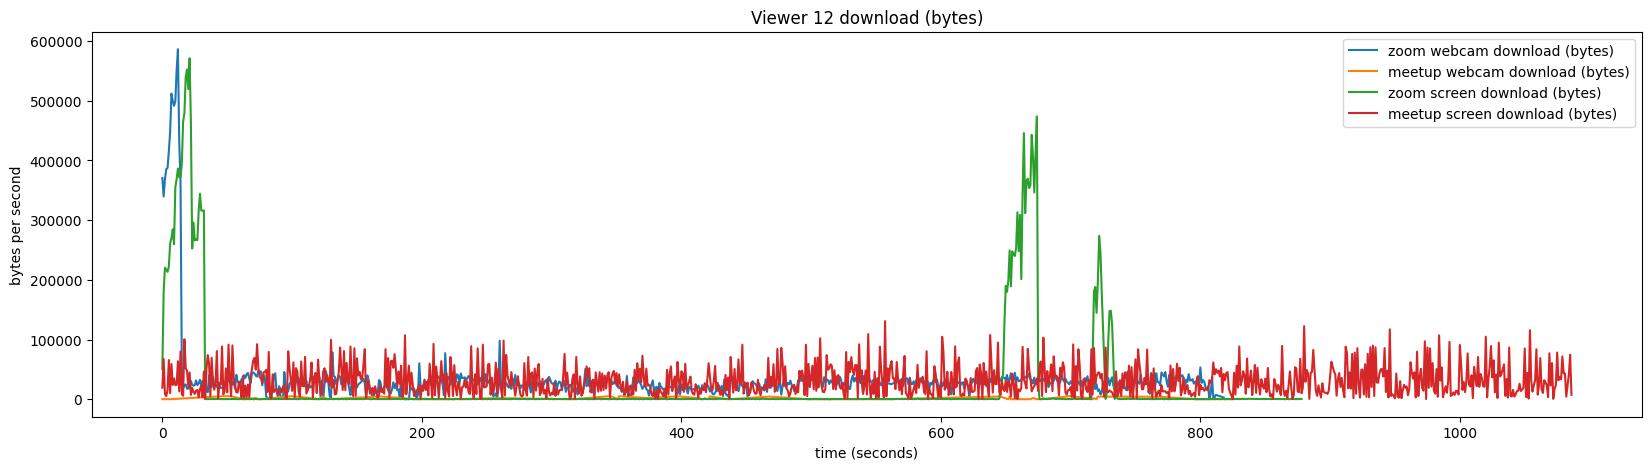

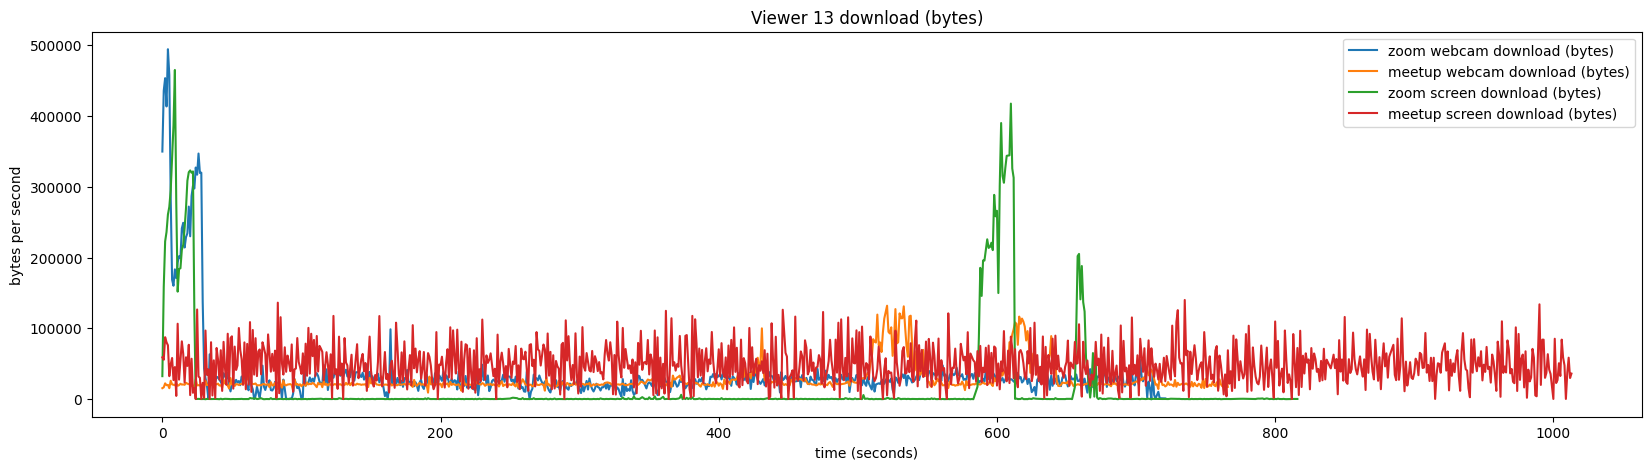

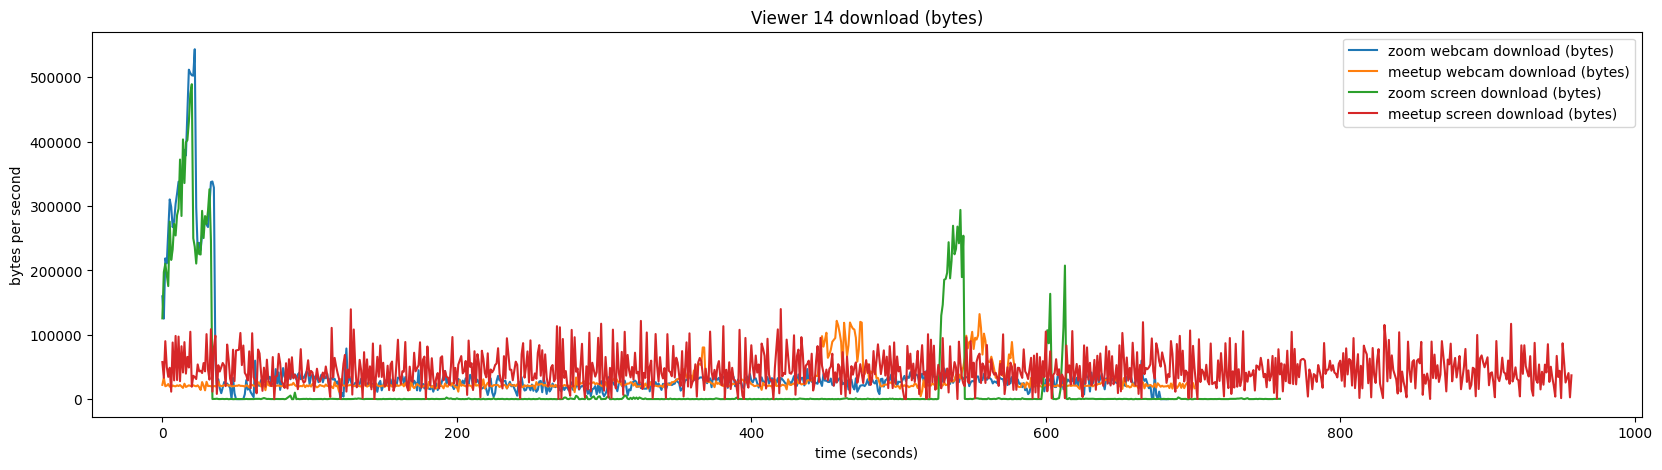

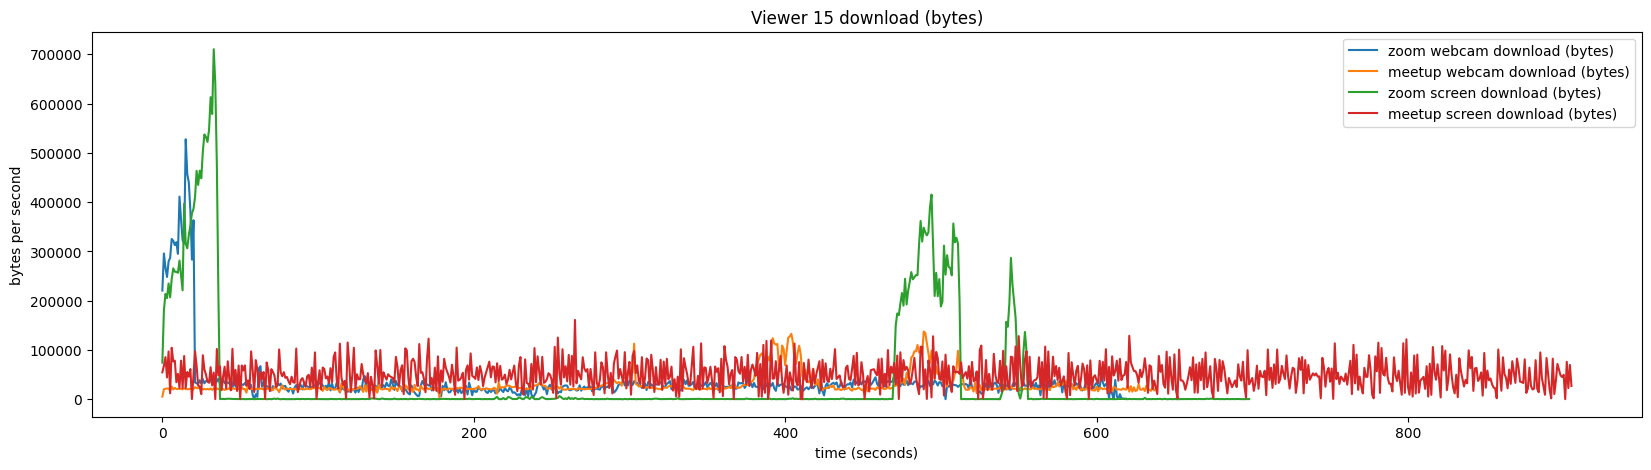

In [273]:
client_throughput_summary = pd.DataFrame()
for user in users:
    for bt in ['download_(bytes)', 'upload_(bytes)']:
        # for ms in ['webcam', 'screen']:
        user_timestamps = bandwidth_timestamps[bandwidth_timestamps['name'] == user].iloc[0]
        zoom_user = zoom_resampled[zoom_resampled['user'] == user]
        siruntu_user = siruntu_resampled[siruntu_resampled['user'] == user]

        webcam_entered = f'webcam_entered'
        webcam_exited = f'webcam_exited'
        screen_entered = f'screen_entered'
        screen_exited = f'screen_exited'

        zoom_user_webcam = zoom_user[(zoom_user['time'] >= user_timestamps[f'zoom_{webcam_entered}']) & (zoom_user['time'] <= user_timestamps[f'zoom_{webcam_exited}'])]
        siruntu_user_webcam = siruntu_user[(siruntu_user['time'] >= user_timestamps[f'siruntu_{webcam_entered}']) & (siruntu_user['time'] <= user_timestamps[f'siruntu_{webcam_exited}'])]

        zoom_user_screen = zoom_user[(zoom_user['time'] >= user_timestamps[f'zoom_{screen_entered}']) & (zoom_user['time'] <= user_timestamps[f'zoom_{screen_exited}'])]
        siruntu_user_screen = siruntu_user[(siruntu_user['time'] >= user_timestamps[f'siruntu_{screen_entered}']) & (siruntu_user['time'] <= user_timestamps[f'siruntu_{screen_exited}'])]

        zoom_user_webcam = zoom_user_webcam.reset_index(drop=True)
        siruntu_user_webcam = siruntu_user_webcam.reset_index(drop=True)

        zoom_user_screen = zoom_user_screen.reset_index(drop=True)
        siruntu_user_screen = siruntu_user_screen.reset_index(drop=True)

        # index
        zoom_user_webcam['index'] = zoom_user_webcam.index
        siruntu_user_webcam['index'] = siruntu_user_webcam.index

        zoom_user_screen['index'] = zoom_user_screen.index
        siruntu_user_screen['index'] = siruntu_user_screen.index

        zoom_min = zoom_user[bt].min()
        siruntu_min = siruntu_user[bt].min()

        zoom_max = zoom_user[bt].max()
        siruntu_max = siruntu_user[bt].max()

        zoom_mean = zoom_user[bt].mean()
        siruntu_mean = siruntu_user[bt].mean()

        types = bt.replace("_", " ")

        if user == 'presenter' and bt == 'upload_(bytes)':
            user_title = user.replace('_', ' ').title()
            bt_title = bt.replace('_', ' ')
            plt.title(f'{user_title} {bt_title}')
            plt.ylabel('bytes per second')
            plt.xlabel('time (seconds)')

            plt.plot(zoom_user_webcam['index'], zoom_user_webcam[bt], label=f'zoom webcam {types}')
            plt.plot(siruntu_user_webcam['index'], siruntu_user_webcam[bt], label=f'meetup webcam {types}')

            plt.plot(zoom_user_screen['index'], zoom_user_screen[bt], label=f'zoom screen {types}')
            plt.plot(siruntu_user_screen['index'], siruntu_user_screen[bt], label=f'meetup screen {types}')

            plt.legend()
            plt.gcf().set_size_inches(20, 5)
            plt.savefig(f'./plot_journal/throughput_{user}_{bt}.jpg')
            plt.show()

            client_throughput_summary = pd.concat([client_throughput_summary, pd.DataFrame({
                'user': user,
                'type': types,
                'zoom_min': "%.2f" % zoom_min,
                'meetup_min': "%.2f" % siruntu_min,
                'zoom_max': "%.2f" % zoom_max,
                'meetup_max': "%.2f" % siruntu_max,
                'zoom_avg': "%.2f" %zoom_mean,
                'meetup_avg': "%.2f" % siruntu_mean,
            }, index=[0])])

        if user != 'presenter' and bt == 'download_(bytes)':
            user_title = user.replace('_', ' ').title()
            bt_title = bt.replace('_', ' ')
            plt.title(f'{user_title} {bt_title}')
            plt.ylabel('bytes per second')
            plt.xlabel('time (seconds)')

            plt.plot(zoom_user_webcam['index'], zoom_user_webcam[bt], label=f'zoom webcam {types}')
            plt.plot(siruntu_user_webcam['index'], siruntu_user_webcam[bt], label=f'meetup webcam {types}')

            plt.plot(zoom_user_screen['index'], zoom_user_screen[bt], label=f'zoom screen {types}')
            plt.plot(siruntu_user_screen['index'], siruntu_user_screen[bt], label=f'meetup screen {types}')

            plt.legend()
            plt.gcf().set_size_inches(20, 5)
            plt.savefig(f'./plot_journal/throughput_{user}_{bt}.jpg')
            plt.show()

            client_throughput_summary = pd.concat([client_throughput_summary, pd.DataFrame({
                'user': user,
                'type': types,
                'zoom_min': "%.2f" % zoom_min,
                'meetup_min': "%.2f" % siruntu_min,
                'zoom_max': "%.2f" % zoom_max,
                'meetup_max': "%.2f" % siruntu_max,
                'zoom_avg': "%.2f" %zoom_mean,
                'meetup_avg': "%.2f" % siruntu_mean,
            }, index=[0])])

In [282]:
summary = client_throughput_summary
summary.columns = summary.columns.str.replace('_', ' ')
summary.columns = summary.columns.str.title()

summary.to_csv('./journal_client_throughput_summary.csv', index=False)
client_throughput_summary

User              Type Zoom Min Meetup Min    Zoom Max Meetup Max  \
0  presenter    upload (bytes)     0.00       0.00   271902.00  272044.00   
0   viewer_1  download (bytes)     0.00       0.00   815183.00  546073.00   
0   viewer_2  download (bytes)     0.00       0.00   656315.00  170009.00   
0   viewer_3  download (bytes)     0.00       0.00   914116.00  180371.00   
0   viewer_4  download (bytes)     0.00       0.00  3096569.00  232776.00   
0   viewer_5  download (bytes)     0.00       0.00  1950989.00  144146.00   
0   viewer_6  download (bytes)     0.00       0.00   601457.00  198459.00   
0   viewer_7  download (bytes)     0.00       0.00  1966821.00  169277.00   
0   viewer_8  download (bytes)     0.00       0.00  2579682.00  170308.00   
0   viewer_9  download (bytes)     0.00       0.00  3353553.00  169293.00   
0  viewer_10  download (bytes)     0.00       0.00  1215772.00  184397.00   
0  viewer_11  download (bytes)     0.00       0.00  3081402.00  134871.00   
0  viewer_12  download (bytes)     0.00       0.00  4410105.00  130757.00   
0  viewer_13  download (bytes)     0.00       0.00  4106865.00  140080.00   
0  viewer_14  download (bytes)     0.00       0.00  2528516.00  139996.00   
0  viewer_15  download (bytes)     0.00       0.00  2015771.00  160996.00   

   Zoom Avg Meetup Avg  
0   3241.68   20110.77  
0  14475.58   29349.09  
0  13929.71   23456.38  
0  20344.43   25464.50  
0  21713.69   24777.74  
0  18182.74   16484.00  
0  11894.05   12455.37  
0  13050.34   18959.27  
0  12422.49   15963.75  
0  12984.44    9936.58  
0  17438.77   13559.61  
0  11575.80    9894.34  
0  12368.32    7826.76  
0   8742.77   14012.19  
0   9746.17   10584.63  
0  11163.91   10702.96

#### CPU and RAM in client side

In [275]:
import os

f = './csv_journal/ram_cpu'
list_files = os.listdir(f)

# remove "CPU RAM - server_siruntu.csv" from list_folder
list_files.remove('CPU RAM - server_siruntu.csv')
# list_files

ram_cpu_df = pd.DataFrame()

for fil in list_files:
    df = pd.read_csv(f'{f}/{fil}')
    ram_cpu_df = pd.concat([ram_cpu_df, df])

ram_cpu_df = ram_cpu_df.drop(columns=['emial'])
ram_cpu_df['time'] = pd.to_datetime(ram_cpu_df['time'], format='%d/%m/%Y %H:%M:%S')
ram_cpu_df['memory'] = ram_cpu_df['memory'].astype(int)
ram_cpu_df['memory'] = (ram_cpu_df['memory'] / 1024).round(2)
ram_cpu_df['cpu'] = ram_cpu_df['cpu'].astype(float)

ram_cpu_df

time  memory   cpu      app   media       user
0  2023-01-30 14:22:17  155.75  68.8    gmeet  webcam  viewer_15
1  2023-01-30 14:23:00  149.68  14.1    gmeet  webcam  viewer_15
2  2023-01-30 14:24:00  154.29  12.5    gmeet  webcam  viewer_15
3  2023-01-30 14:25:00  153.26  28.1    gmeet  webcam  viewer_15
4  2023-01-30 14:26:00  146.29  12.5    gmeet  webcam  viewer_15
..                 ...     ...   ...      ...     ...        ...
49 2023-02-15 15:16:00   67.08  15.5  siruntu  screen   viewer_3
50 2023-02-15 15:17:00   66.44   1.6  siruntu  screen   viewer_3
51 2023-02-15 15:18:00   66.55   4.7  siruntu  screen   viewer_3
52 2023-02-15 15:19:00   66.29   1.6  siruntu  screen   viewer_3
53 2023-02-15 15:20:15   66.16   7.7  siruntu  screen   viewer_3

[1945 rows x 6 columns]

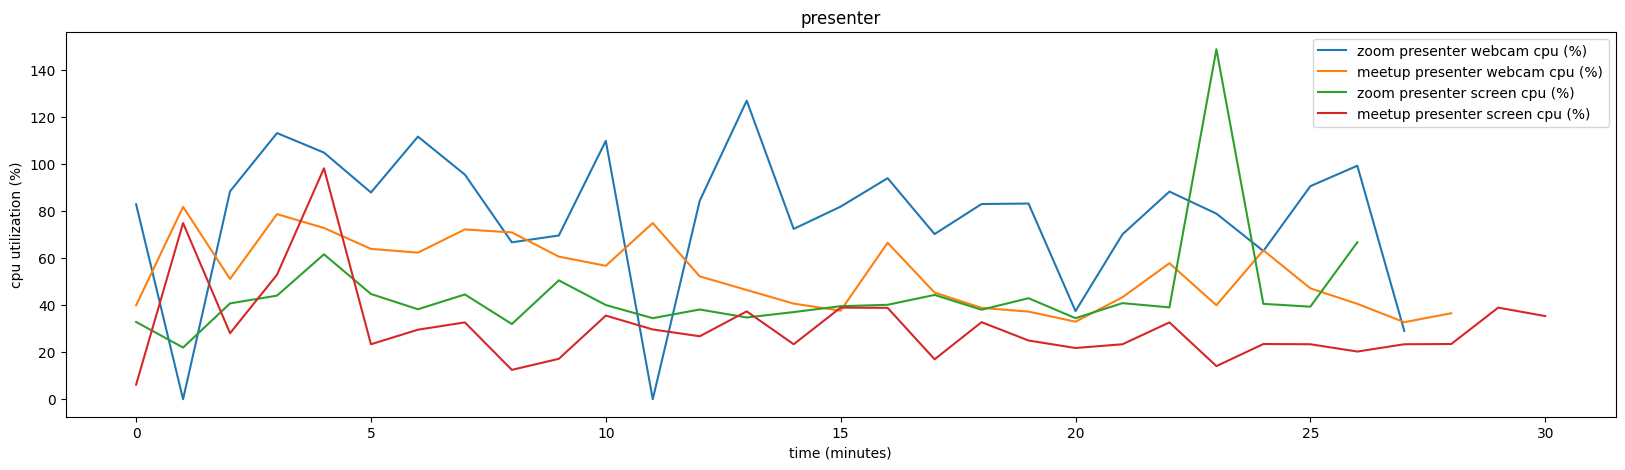

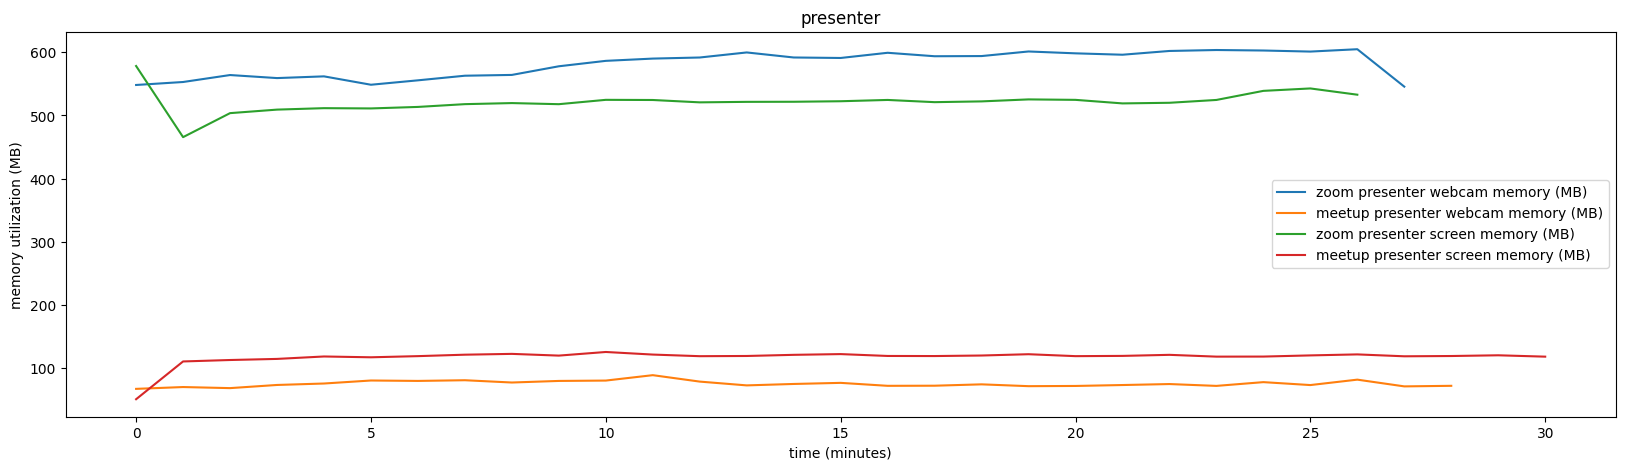

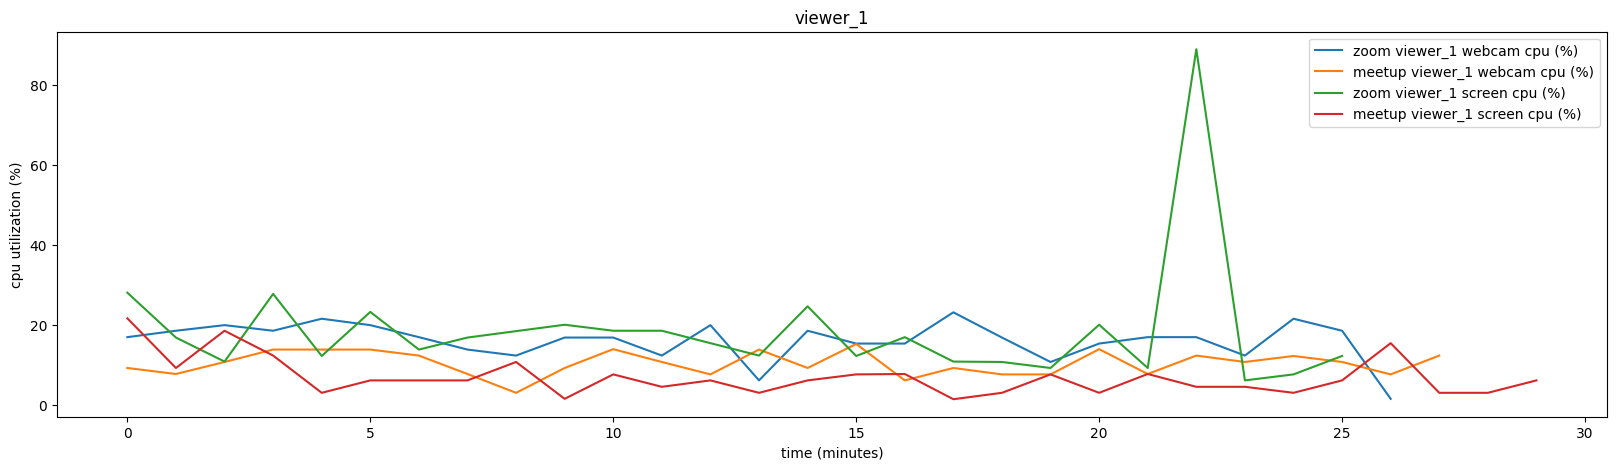

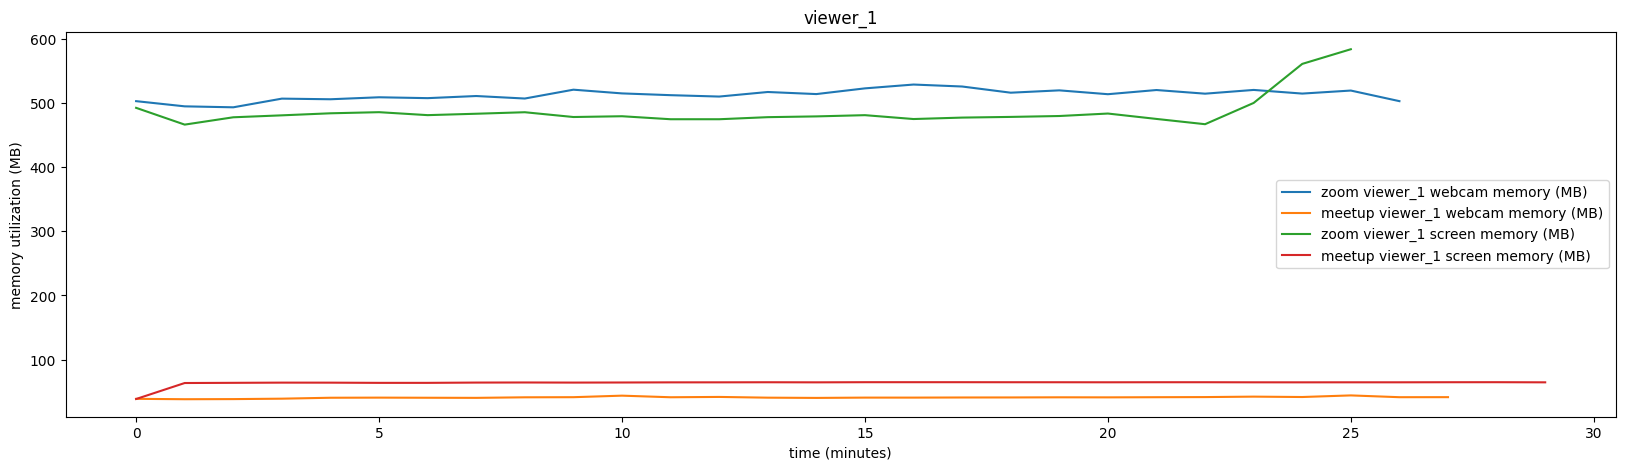

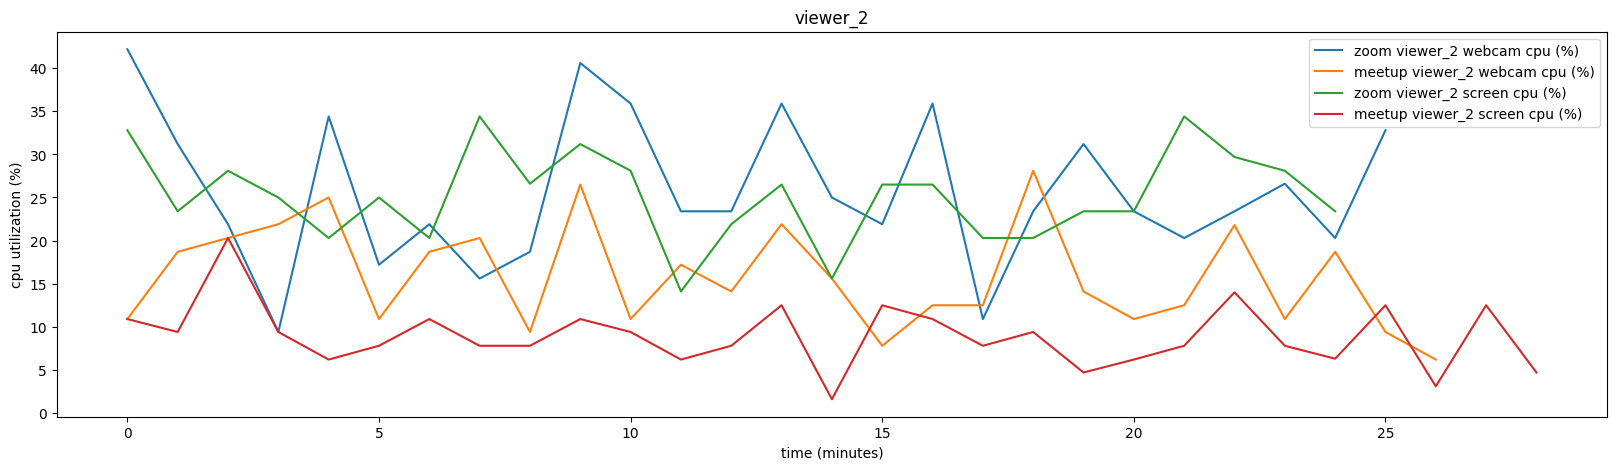

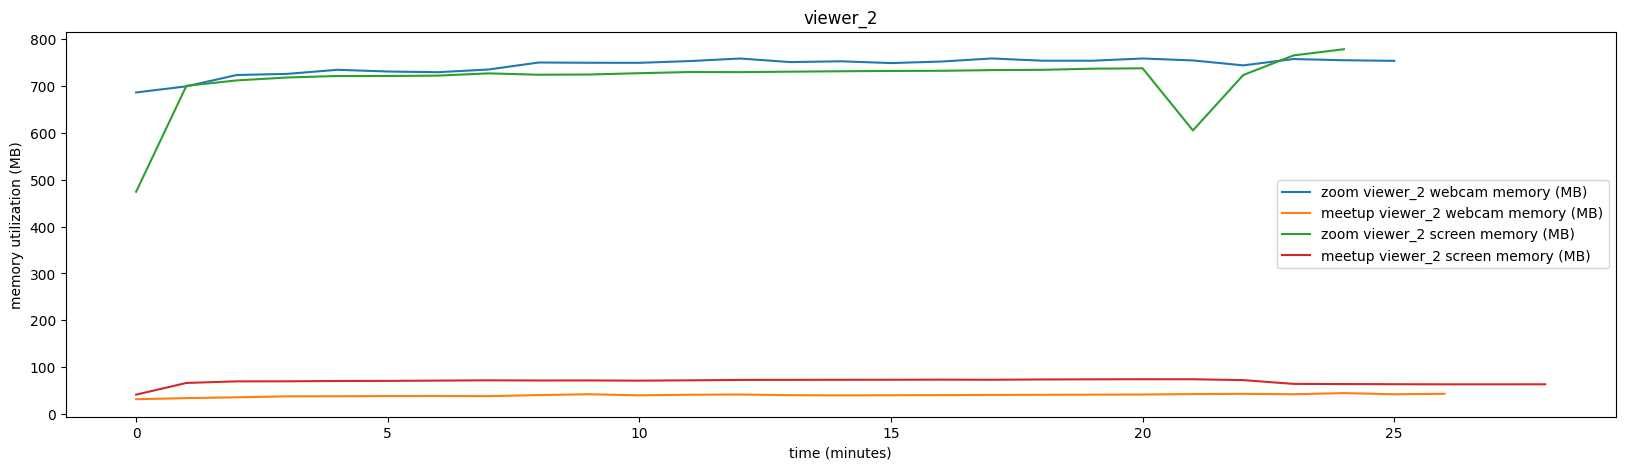

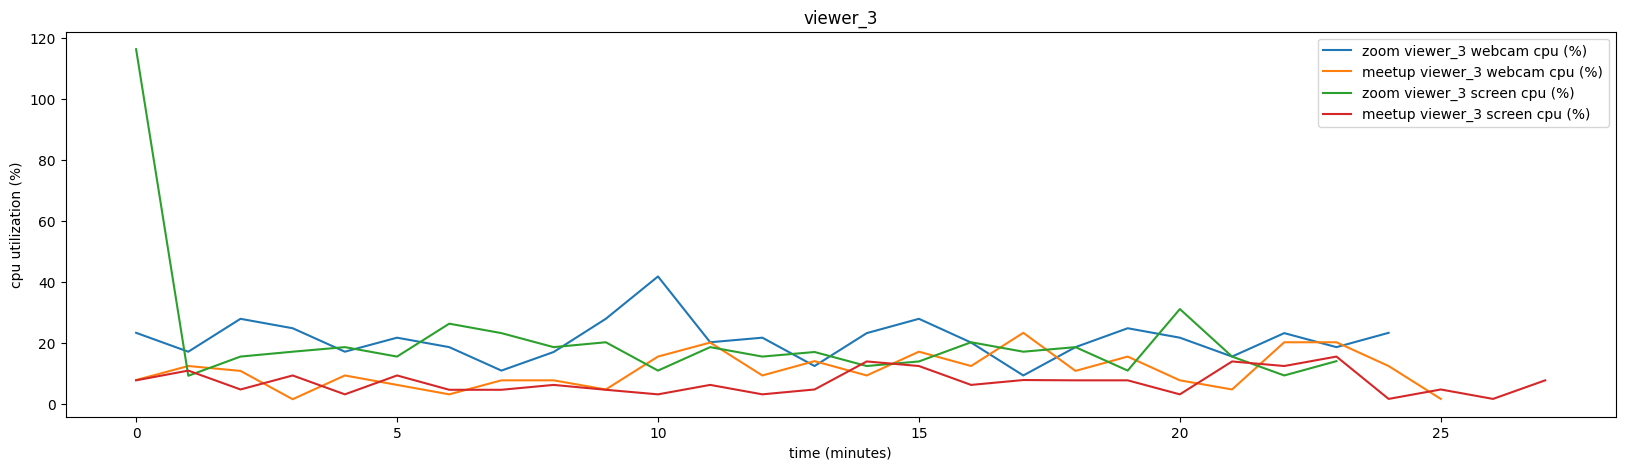

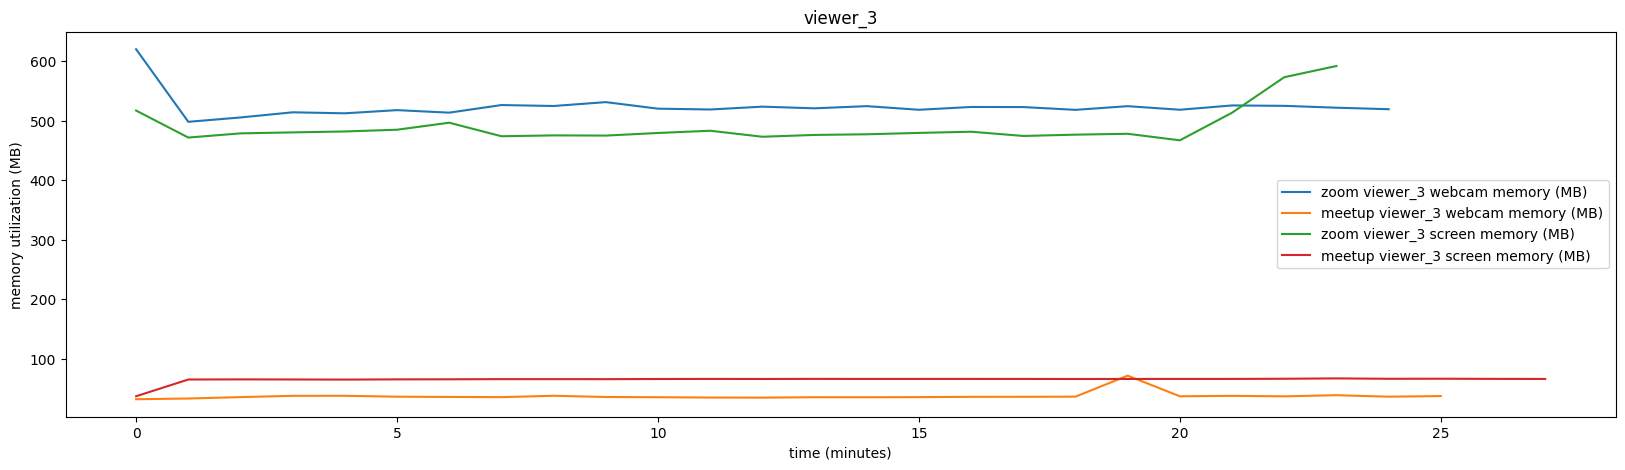

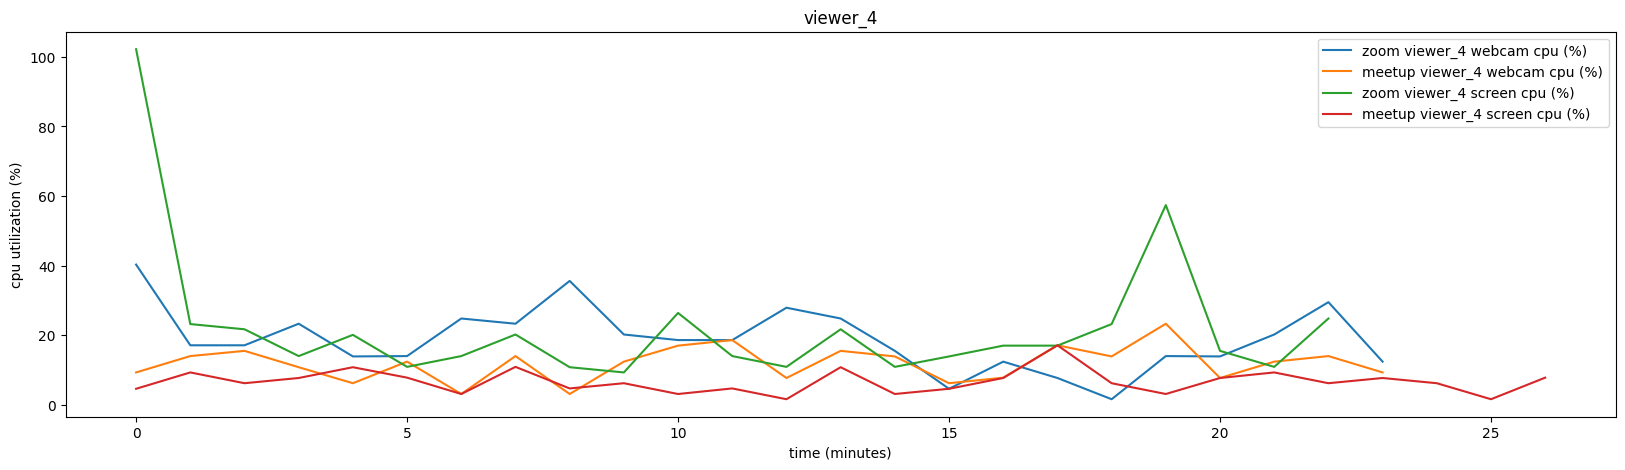

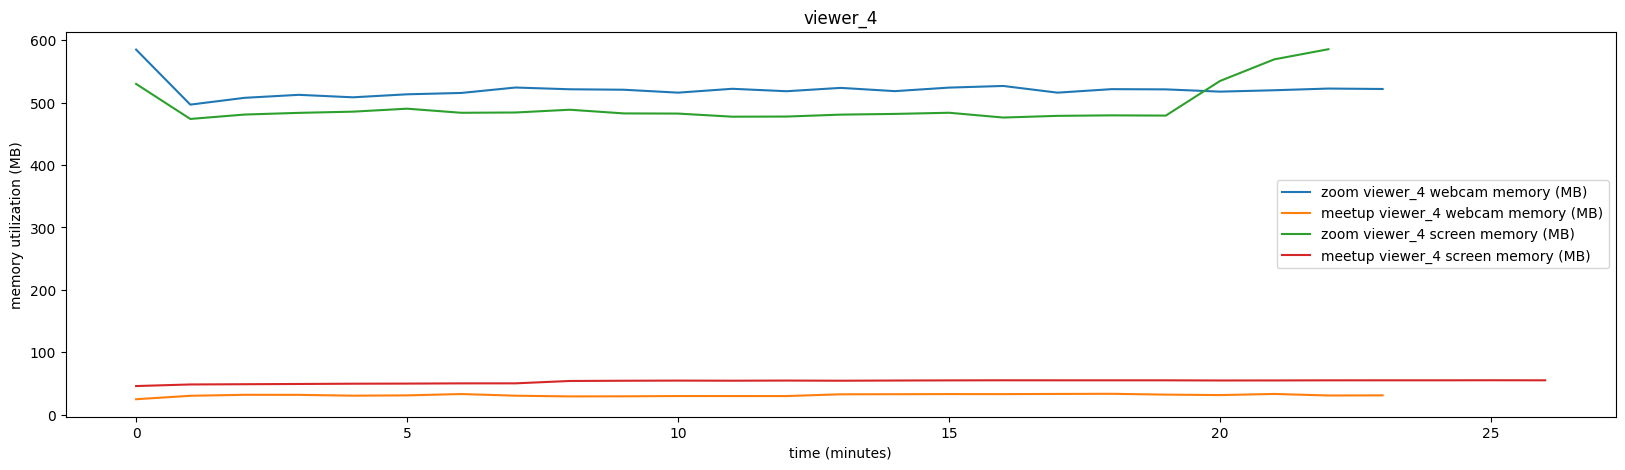

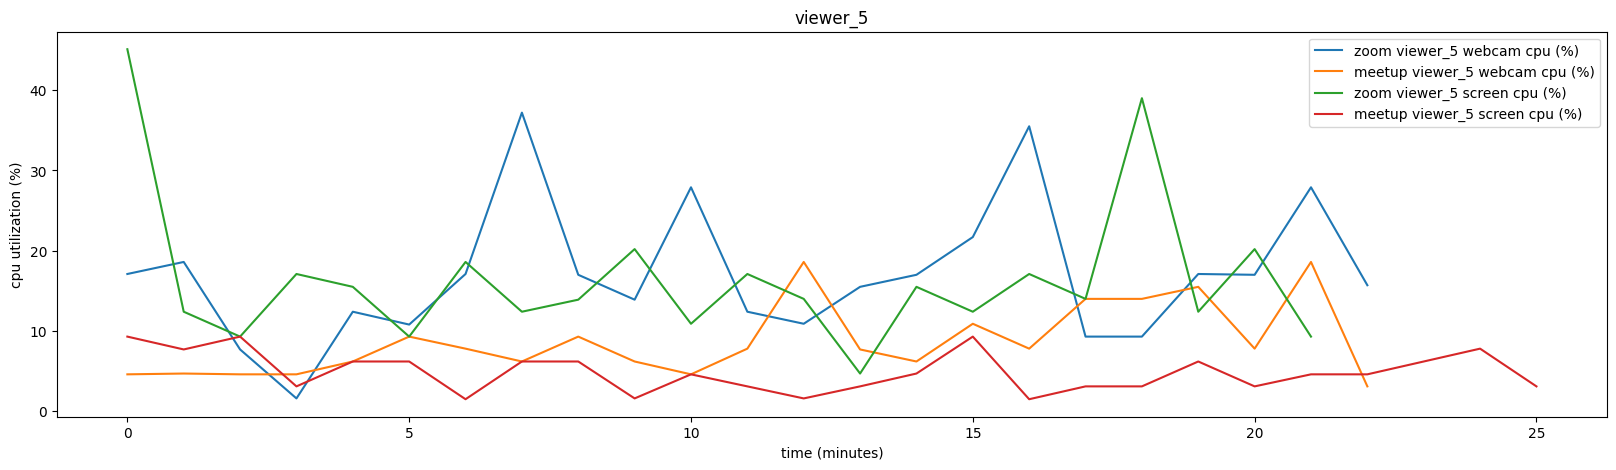

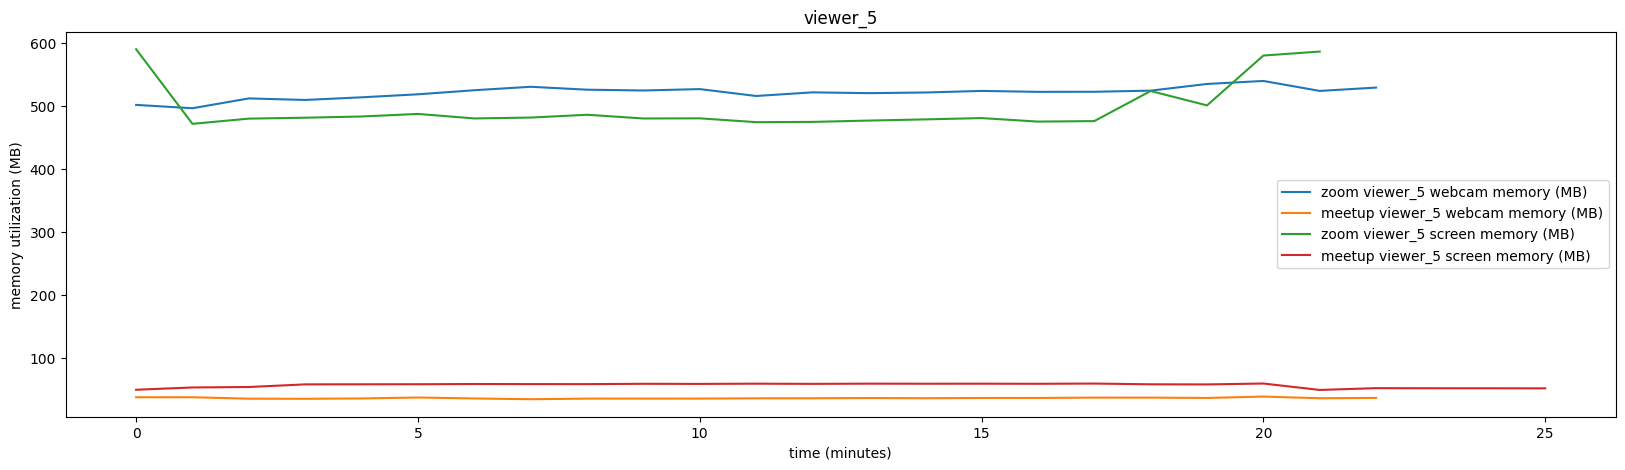

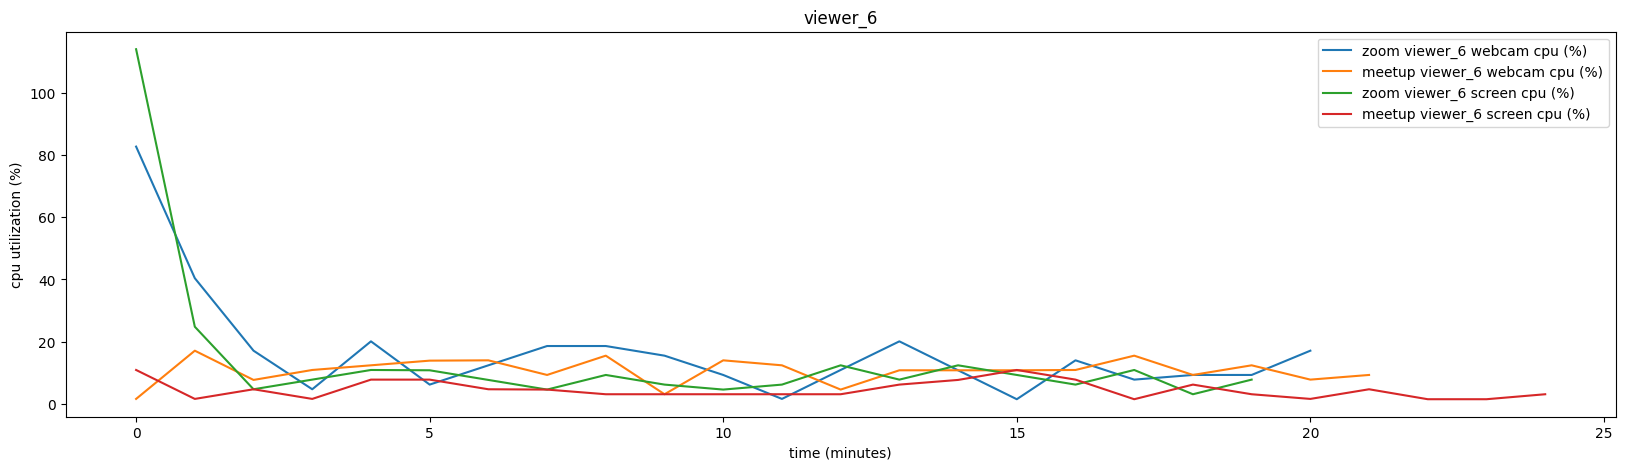

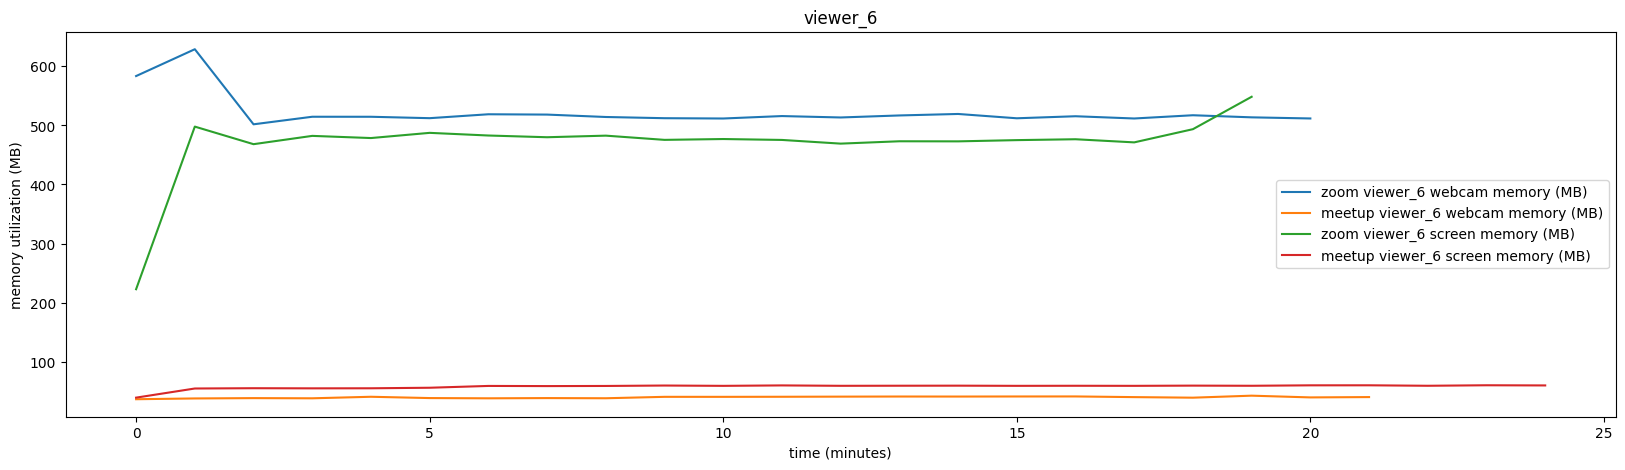

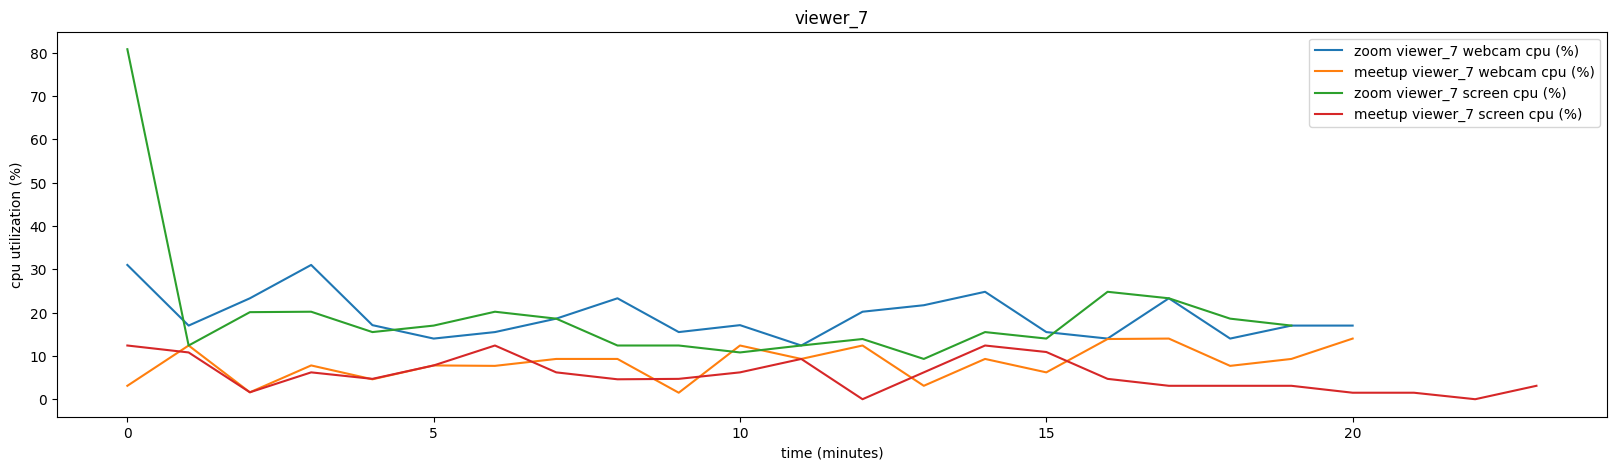

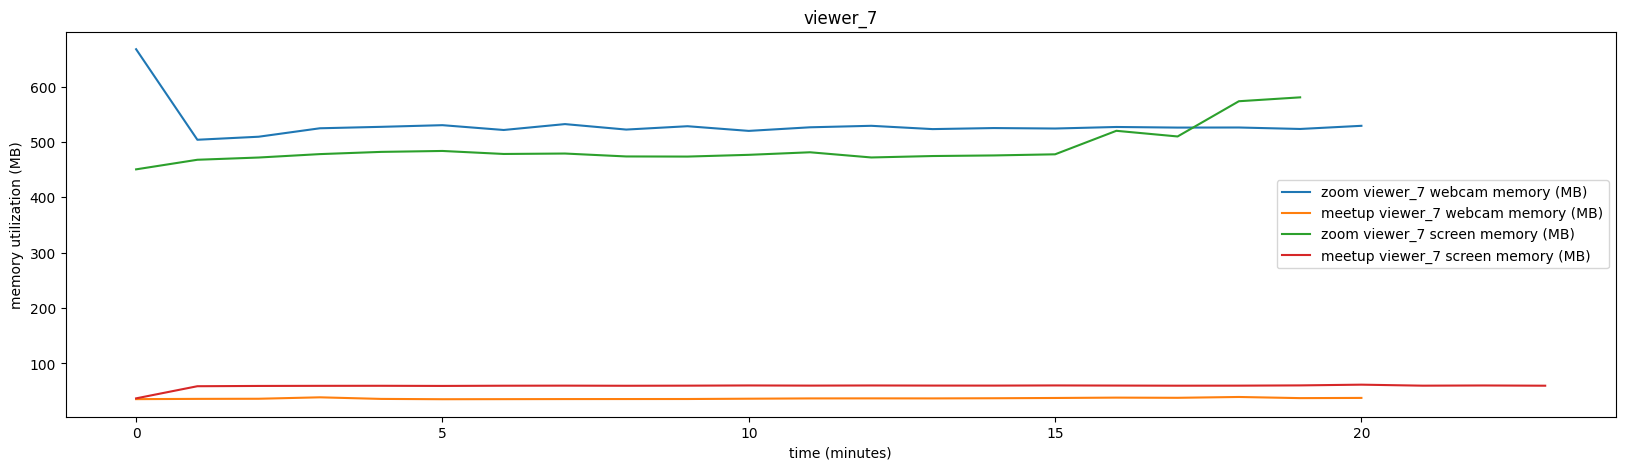

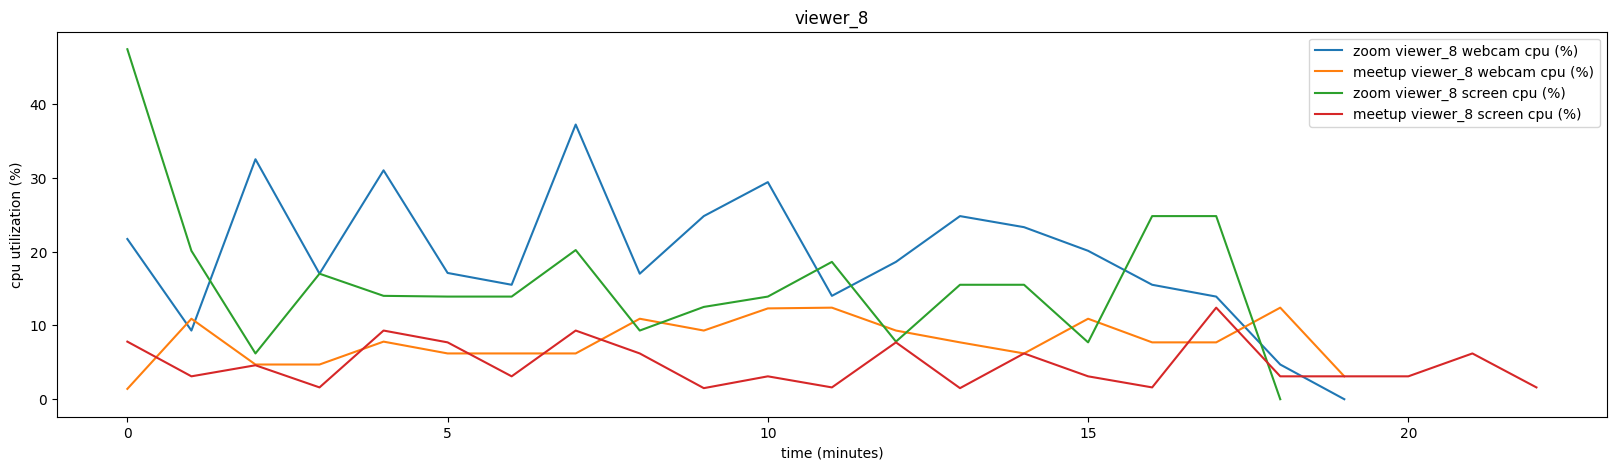

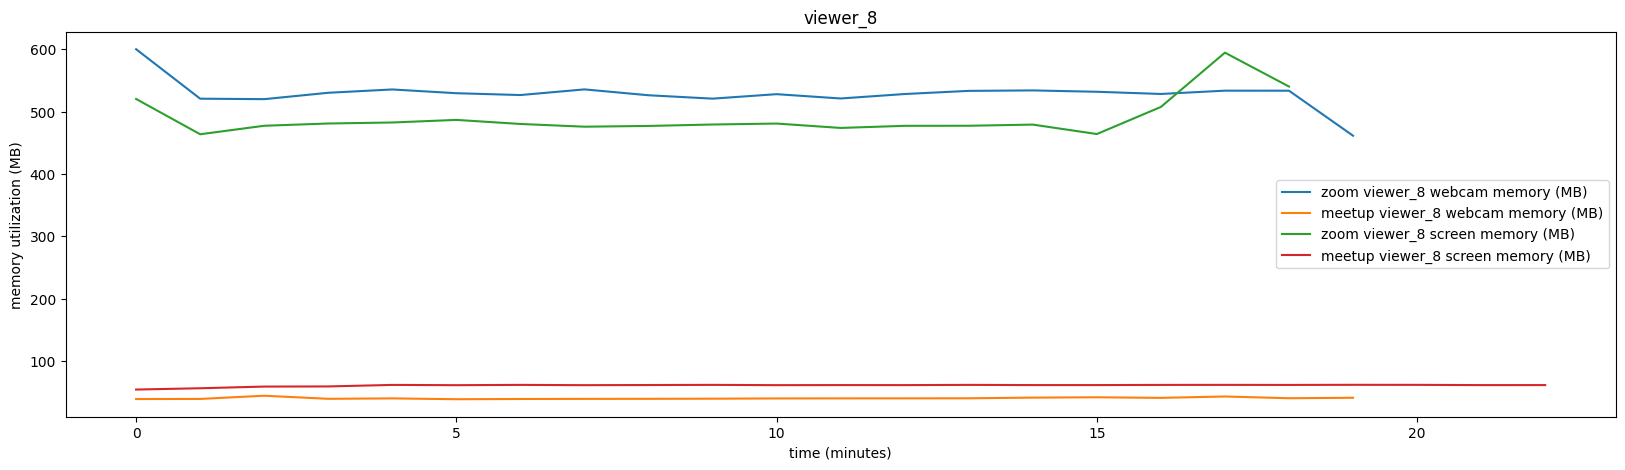

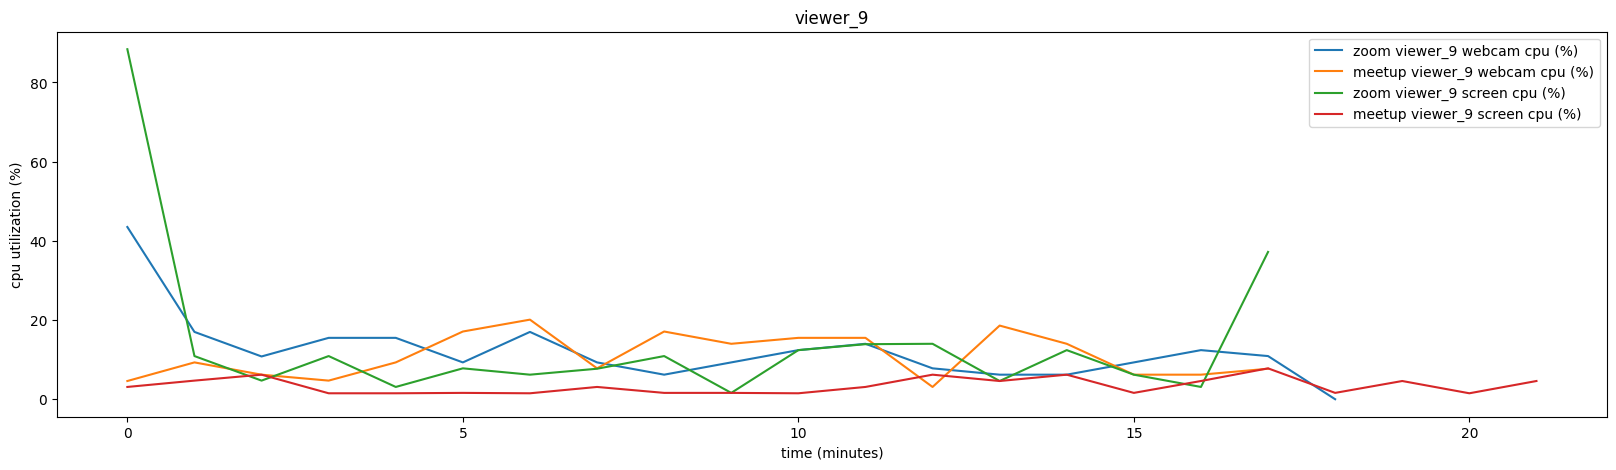

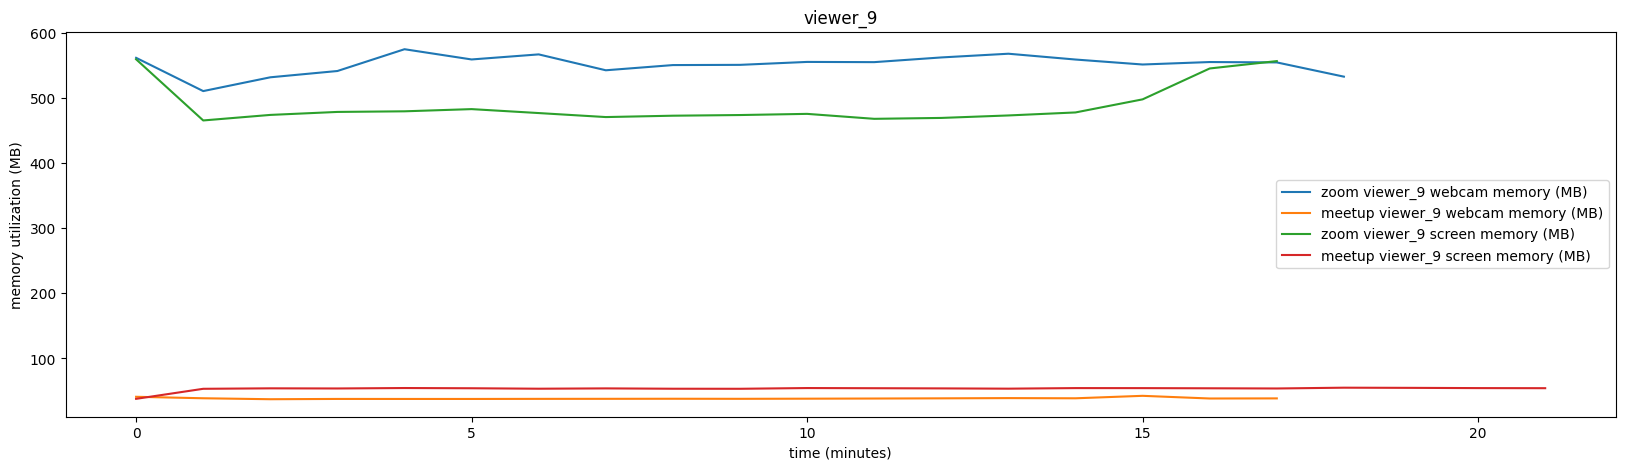

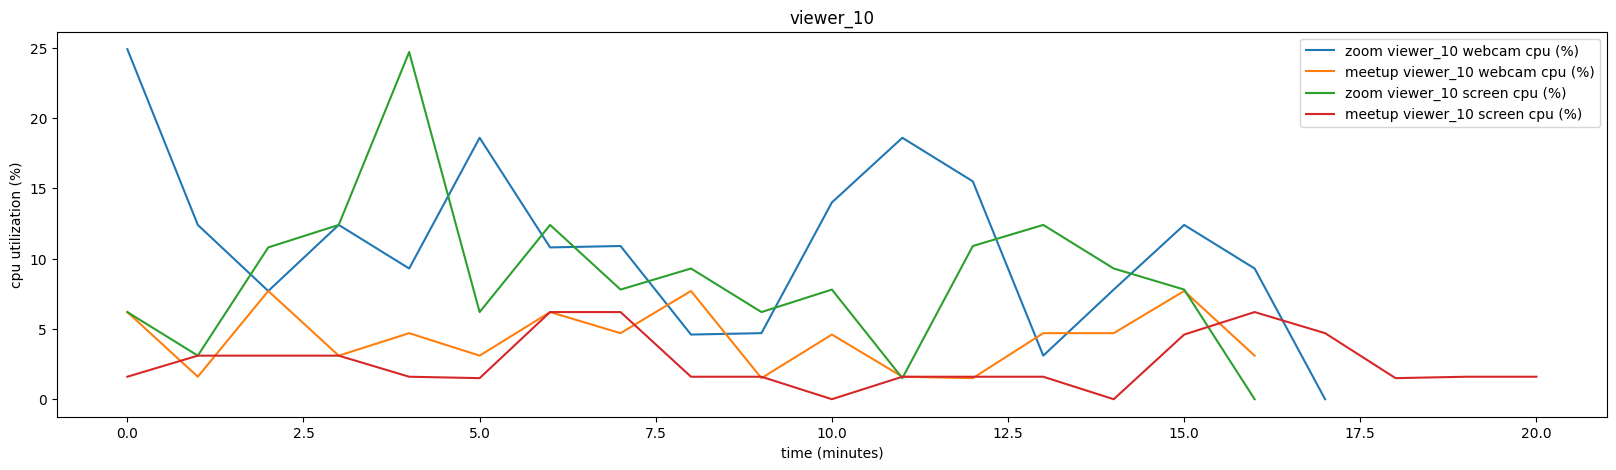

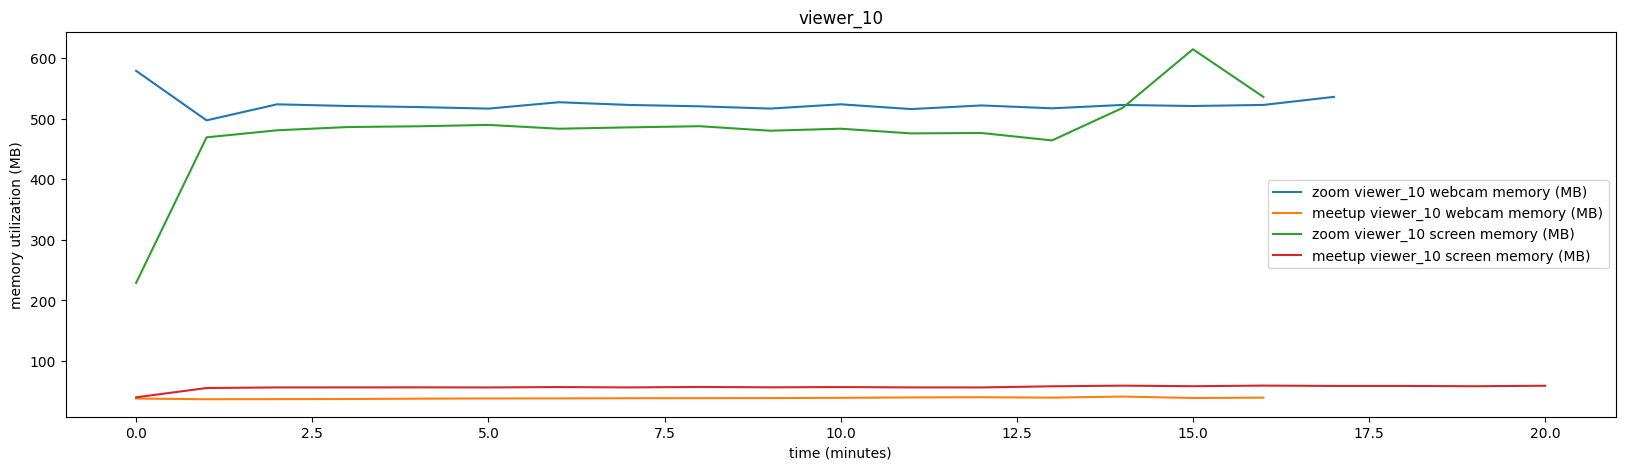

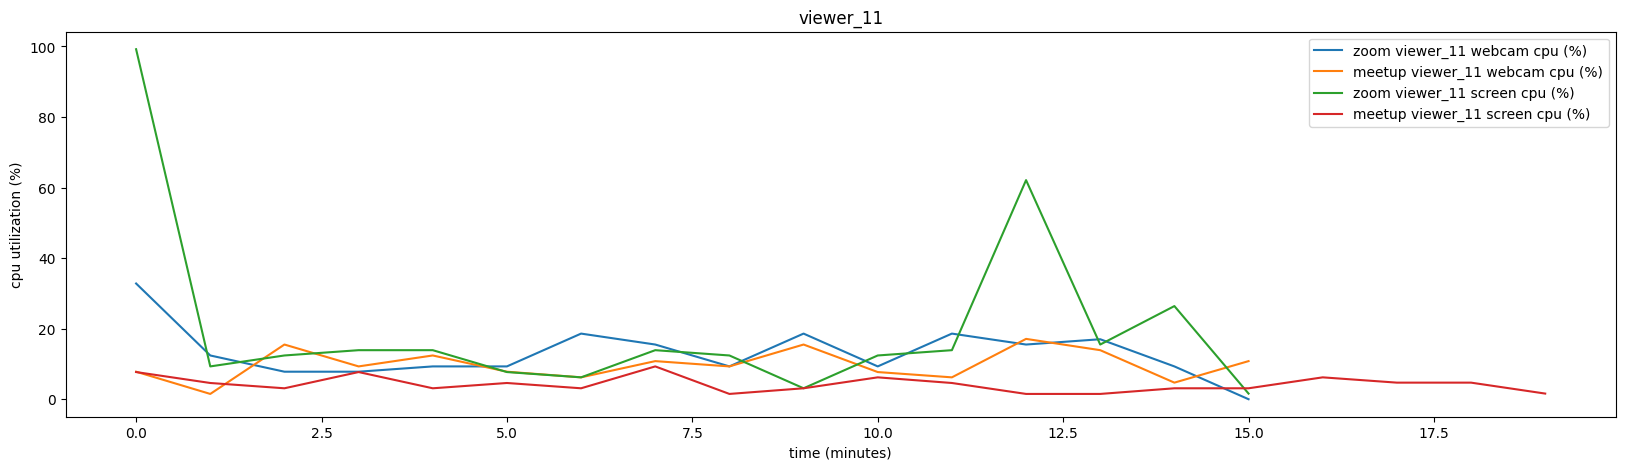

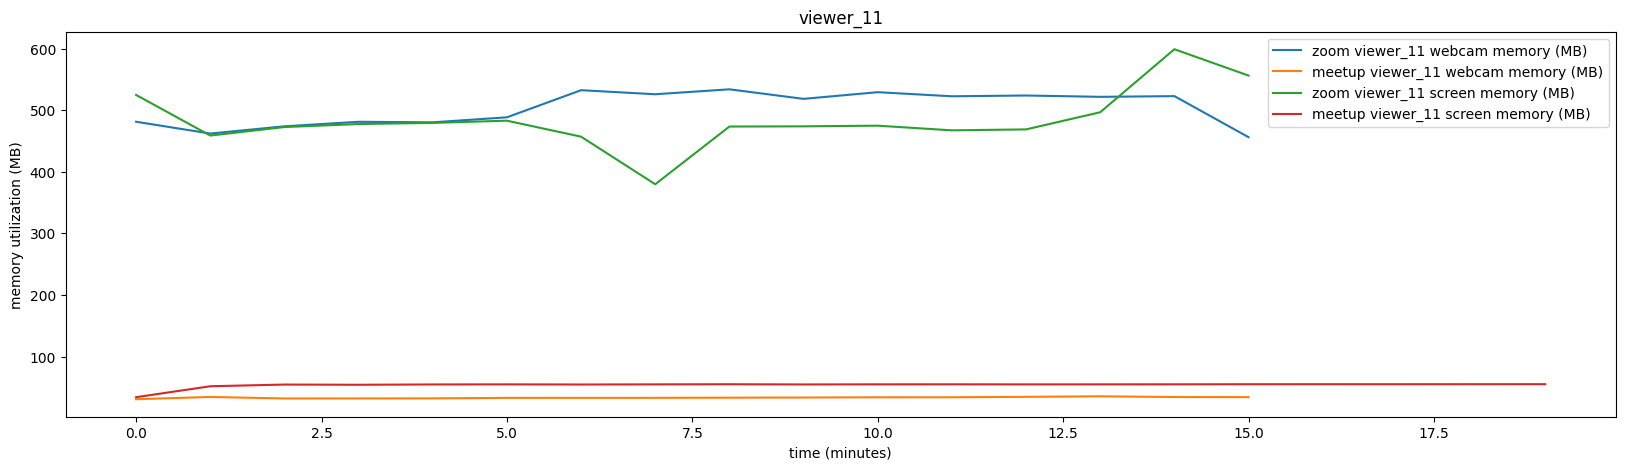

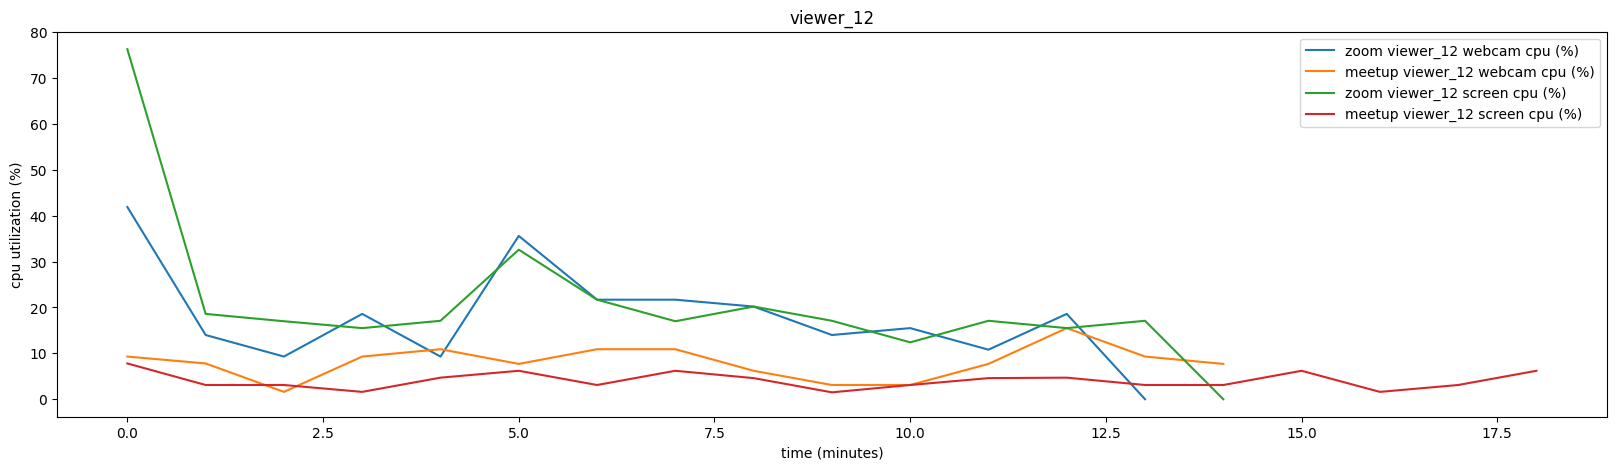

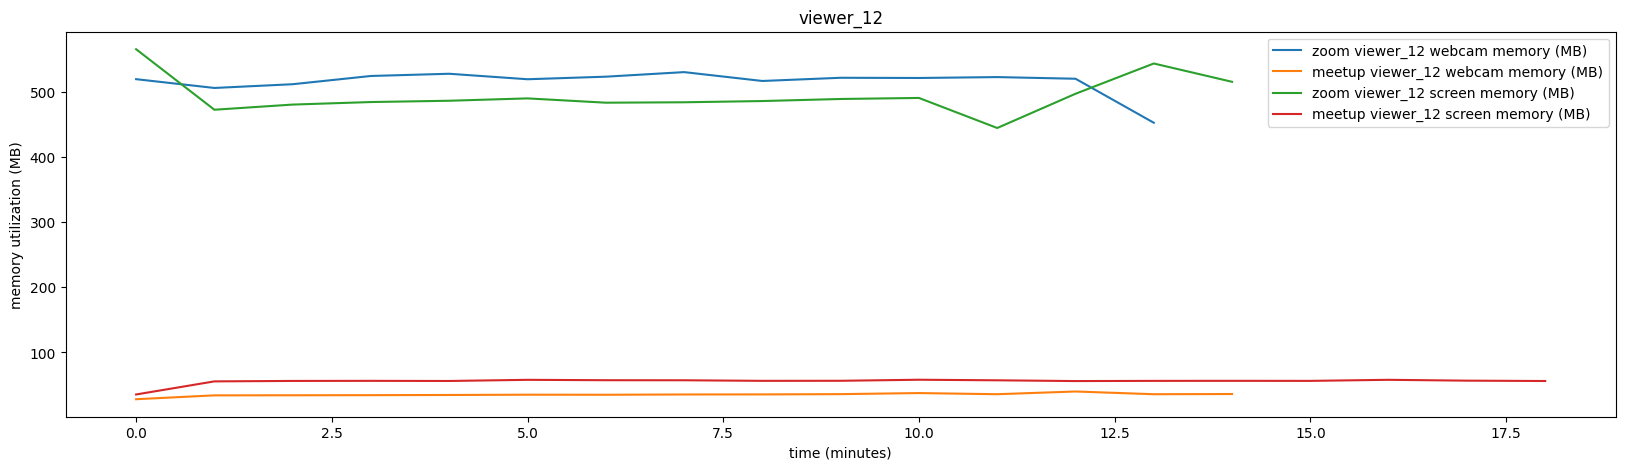

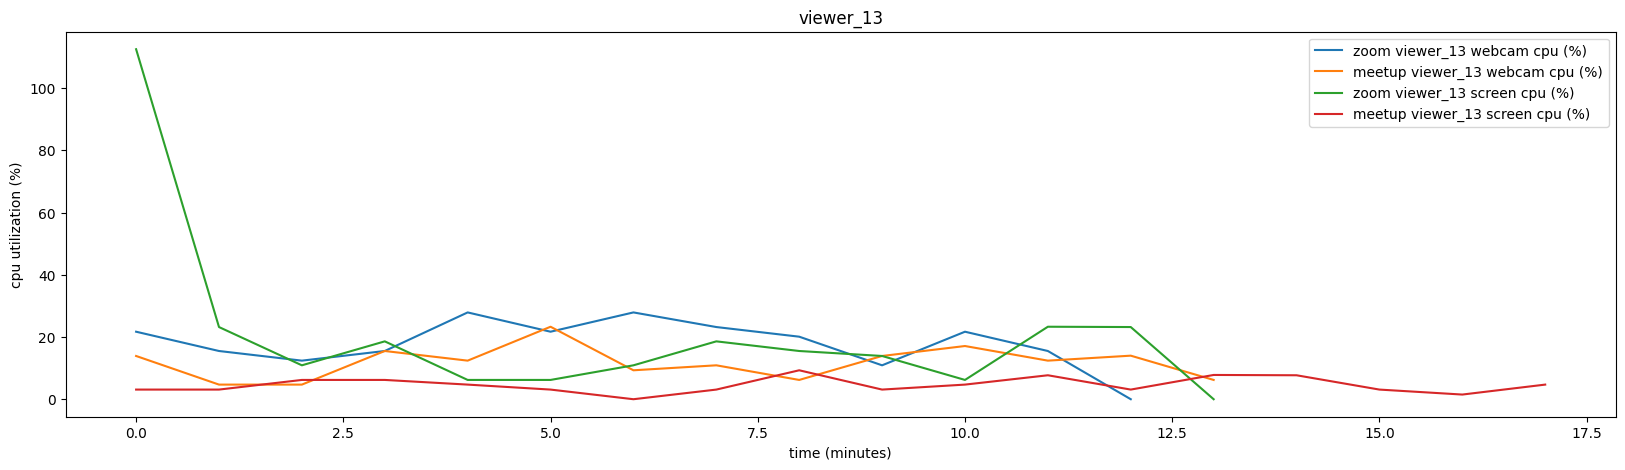

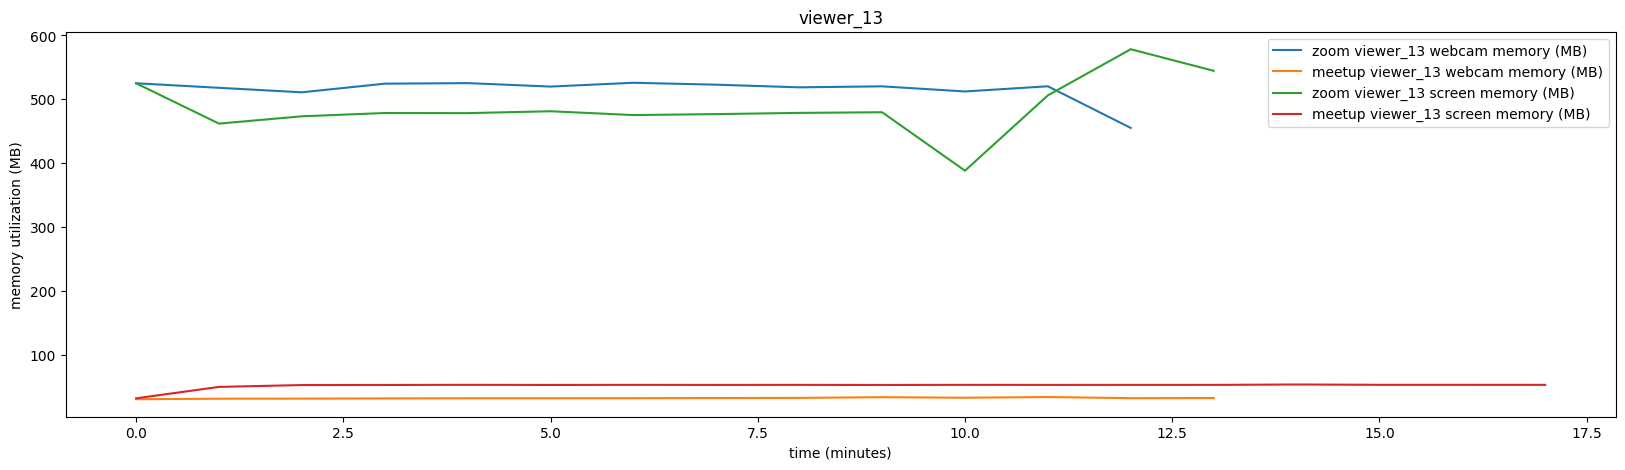

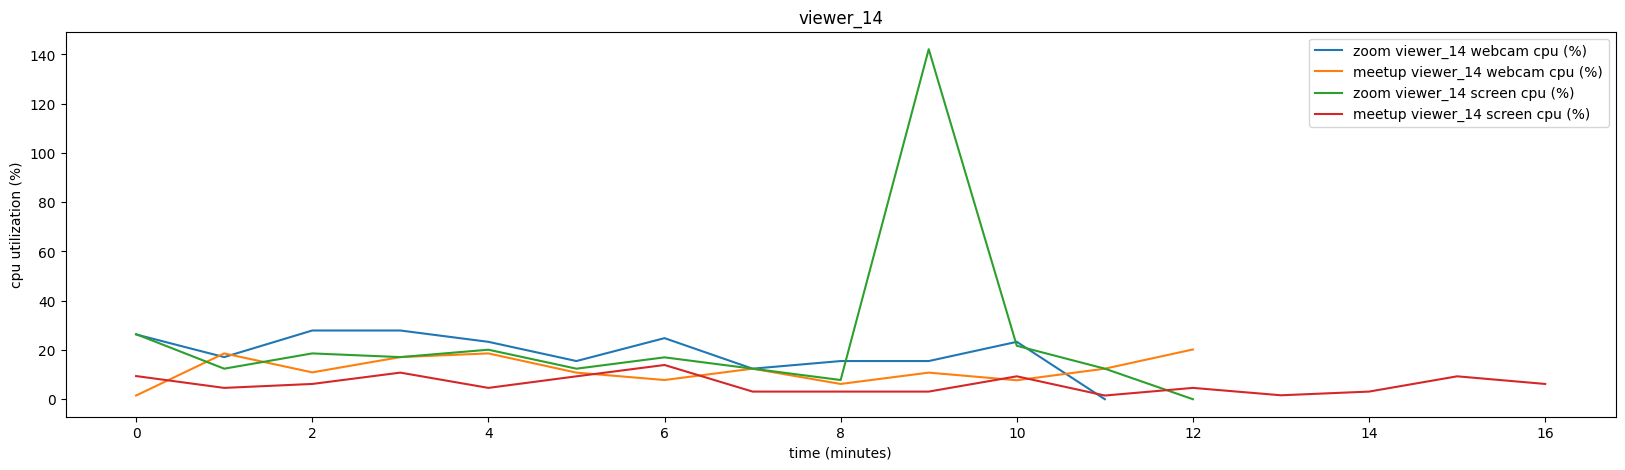

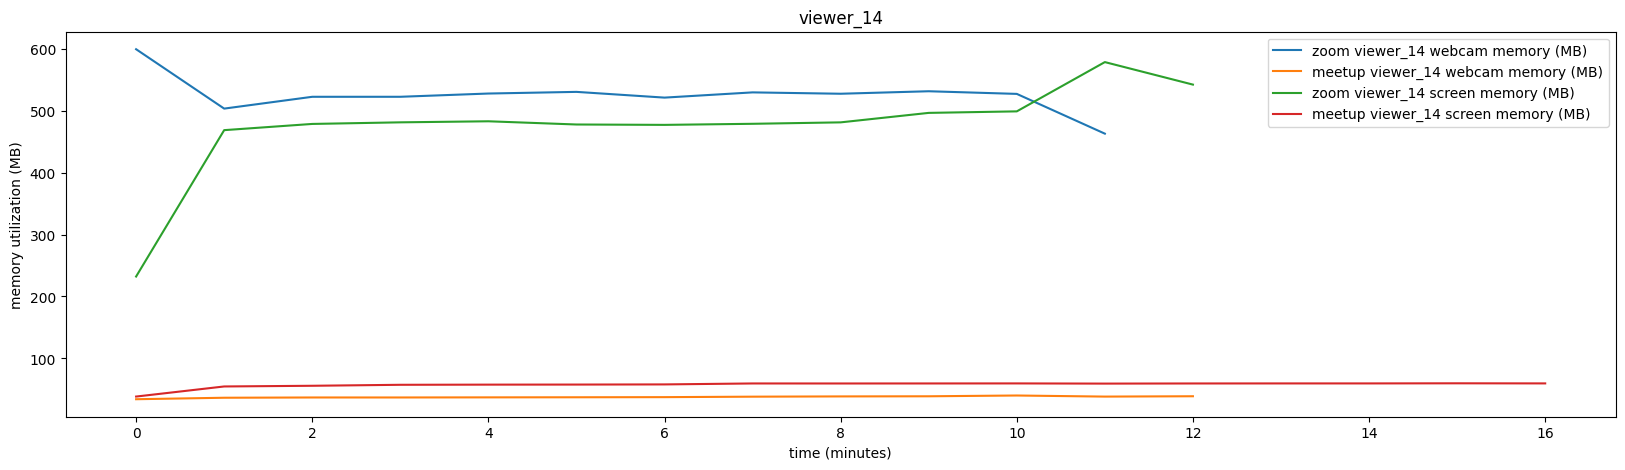

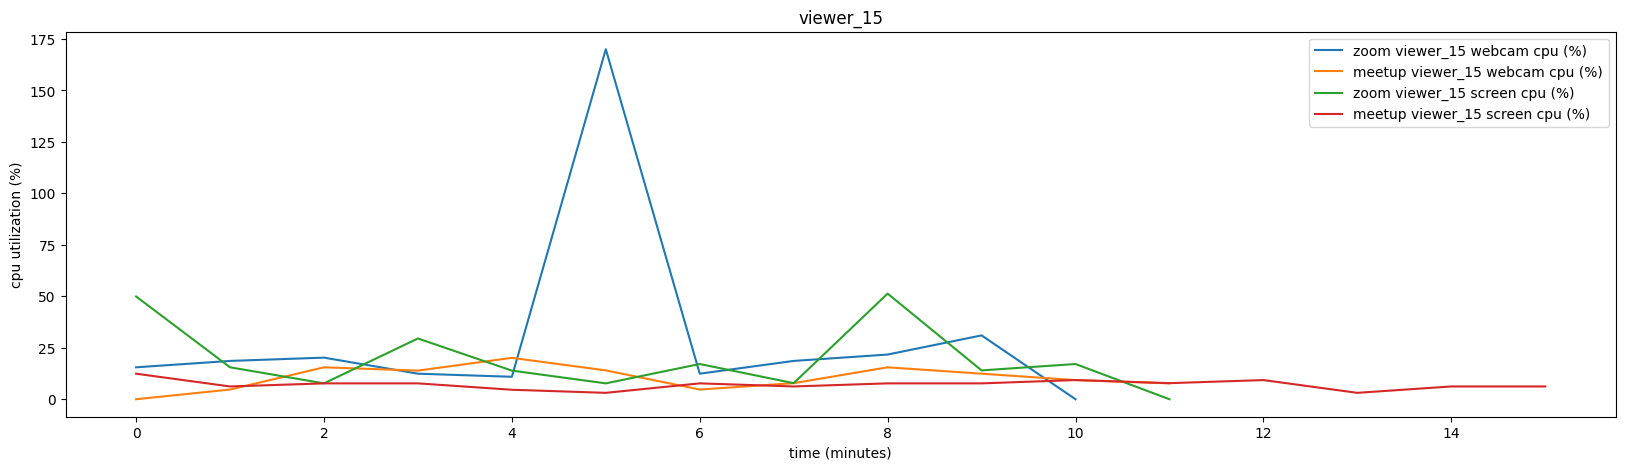

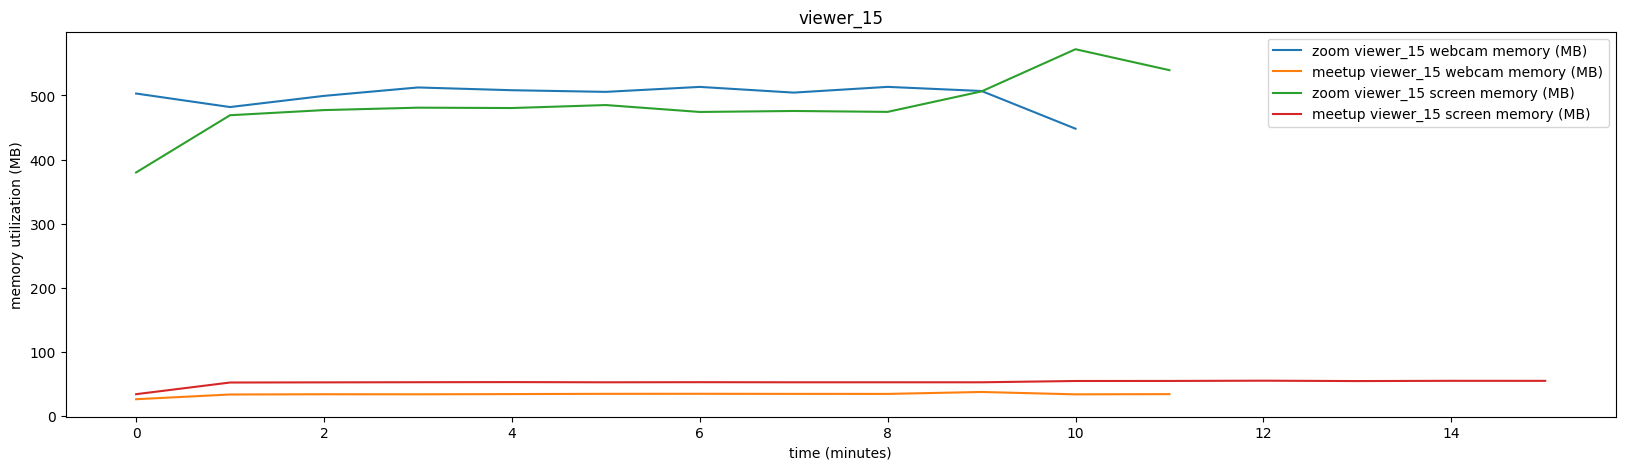

In [276]:
for user in users:
    for rs in ['cpu', 'memory']:
        # for ms in ['webcam', 'screen']:
        ram_cpu_user = ram_cpu_df[ram_cpu_df['user'] == user]

        zoom_resource_webcam = ram_cpu_user[(ram_cpu_user['app'] == 'zoom') & (ram_cpu_user['media'] == 'webcam')].reset_index(drop=True)
        siruntu_resource_webcam = ram_cpu_user[(ram_cpu_user['app'] == 'siruntu') & (ram_cpu_user['media'] == 'webcam')].reset_index(drop=True)

        zoom_resource_screen = ram_cpu_user[(ram_cpu_user['app'] == 'zoom') & (ram_cpu_user['media'] == 'screen')].reset_index(drop=True)
        siruntu_resource_screen = ram_cpu_user[(ram_cpu_user['app'] == 'siruntu') & (ram_cpu_user['media'] == 'screen')].reset_index(drop=True)

        zoom_resource_webcam['index'] = zoom_resource_webcam.index
        siruntu_resource_webcam['index'] = siruntu_resource_webcam.index

        zoom_resource_screen['index'] = zoom_resource_screen.index
        siruntu_resource_screen['index'] = siruntu_resource_screen.index

        unit = '(MB)' if rs == 'memory' else '(%)'
        plt.title(f'{user}')
        # give description to x and y axis
        plt.xlabel('time (minutes)')
        plt.ylabel(f'{rs} utilization {unit}')
        plt.plot(zoom_resource_webcam['index'], zoom_resource_webcam[rs], label=f'zoom {user} webcam {rs} {unit}')
        plt.plot(siruntu_resource_webcam['index'], siruntu_resource_webcam[rs], label=f'meetup {user} webcam {rs} {unit}')
        plt.plot(zoom_resource_screen['index'], zoom_resource_screen[rs], label=f'zoom {user} screen {rs} {unit}')
        plt.plot(siruntu_resource_screen['index'], siruntu_resource_screen[rs], label=f'meetup {user} screen {rs} {unit}')

        plt.legend()
        plt.gcf().set_size_inches(20, 5)
        plt.savefig(f'./plot_journal/cpu_memory_{user}_{rs}.jpg')
        plt.show()

In [277]:
# client_cpu_ram_summary.to_csv('client_cpu_bandwidth_summary.csv', index=False)
# summary_cpu_ram = client_cpu_ram_summary
# summary_cpu_ram.columns = summary_cpu_ram.columns.str.replace('_', ' ')
# summary_cpu_ram.columns = summary_cpu_ram.columns.str.title()
# summary_cpu_ram.to_csv('./summary/case_1_client_cpu_ram_summary.csv', index=False)

# summary_cpu_ram

### Server  usage resources

#### Load files

In [278]:
files = './csv_journal/ram_cpu/CPU RAM - server_siruntu.csv'

df = pd.read_csv(files)
df['time'] = pd.to_datetime(df['time'], format='%d/%m/%Y %H:%M:%S')
df['memory'] = df['memory'].astype(int)
df['memory'] = (df['memory'] / 1024).round(2)
df['cpu'] = df['cpu'].astype(float)

# # remove "," from donwload and upload columns dan replace with "."
# df['download (bytes)'] = df['download (bytes)'].str.replace(
#     ',', '.').astype(float)
# df['upload (bytes)'] = df['upload (bytes)'].str.replace(',', '.').astype(float)
# convert bytes to kbytes

df['download (bytes)'] = (df['download (bytes)'] / 1024).round(2)
df['upload (bytes)'] = (df['upload (bytes)'] / 1024).round(2)
# rename columns
df = df.rename(columns={'download (bytes)': 'download (kbytes)',
               'upload (bytes)': 'upload (kbytes)'})
df

time  memory    cpu  download (kbytes)  upload (kbytes)  \
0  2023-02-15 14:20:14   30.02   0.01               0.15             0.46   
1  2023-02-15 14:21:00   34.21   1.68              21.16            21.83   
2  2023-02-15 14:22:00   35.41   2.59              54.08            60.94   
3  2023-02-15 14:23:00   38.75   3.04              44.33           172.12   
4  2023-02-15 14:25:00   40.93   3.49              25.92            64.68   
5  2023-02-15 14:26:00   43.22   3.85              20.01            70.70   
6  2023-02-15 14:27:00   46.41   4.01              30.66           202.64   
7  2023-02-15 14:28:00   50.22   5.54              38.90           222.17   
8  2023-02-15 14:29:00   52.85   5.40              25.04           146.48   
9  2023-02-15 14:31:00   58.53   7.27              23.23           146.48   
10 2023-02-15 14:32:00   58.99   6.67              25.18           184.33   
11 2023-02-15 14:33:00   61.54   8.56              26.25           211.18   
12 2023-02-15 14:34:00   64.40   8.38              26.97           240.48   
13 2023-02-15 14:35:00   66.35   8.37              27.32           250.24   
14 2023-02-15 14:36:00   69.20  10.54              29.37           281.98   
15 2023-02-15 14:37:00   71.09  10.35              29.59           299.07   
16 2023-02-15 14:50:30   77.88   2.57              23.34            25.84   
17 2023-02-15 14:51:00   77.84   0.78              16.77             2.25   
18 2023-02-15 14:52:00   78.23   0.58              14.41            22.94   
19 2023-02-15 14:53:00   79.29   1.33              18.73            48.58   
20 2023-02-15 14:54:00   80.10   2.27              35.48           158.69   
21 2023-02-15 14:55:00   81.72   1.14              24.76            55.62   
22 2023-02-15 14:56:00   82.87   3.78              26.93            67.20   
23 2023-02-15 14:57:00   84.36   3.84              23.70            26.17   
24 2023-02-15 14:58:00   85.95   7.58              44.85          1492.92   
25 2023-02-15 14:59:00   87.66   4.48              25.33           970.46   
26 2023-02-15 15:00:00   89.38  11.14              37.32          3973.39   
27 2023-02-15 15:01:00   90.75   7.35              34.35          3468.02   
28 2023-02-15 15:02:00   91.82  20.87              47.34          7995.61   
29 2023-02-15 15:03:00   94.03  19.08              40.81          6256.10   
30 2023-02-15 15:04:00   95.63  10.39              41.91          5770.26   
31 2023-02-15 15:05:00   97.30  28.84              51.94          9370.12   

        app   media    user  download   upload download (unit) upload (unit)  \
0   siruntu  webcam  server      1.22     3.74               k             k   
1   siruntu  webcam  server    173.38   178.84               k             k   
2   siruntu  webcam  server    442.99   499.21               k             k   
3   siruntu  webcam  server    363.19  1410.00               k             k   
4   siruntu  webcam  server    212.34   529.85               k             k   
5   siruntu  webcam  server    163.91   579.16               k             k   
6   siruntu  webcam  server    251.14  1660.00               k             k   
7   siruntu  webcam  server    318.64  1820.00               k             k   
8   siruntu  webcam  server    205.13  1200.00               k             k   
9   siruntu  webcam  server    190.32  1200.00               k             k   
10  siruntu  webcam  server    206.26  1510.00               k             k   
11  siruntu  webcam  server    215.05  1730.00               k             k   
12  siruntu  webcam  server    220.91     1.97               k             m   
13  siruntu  webcam  server    223.79     2.05               k             m   
14  siruntu  webcam  server    240.59     2.31               k             m   
15  siruntu  webcam  server    242.42     2.45               k             m   
16  siruntu  screen  server    191.23   211.68               k             k   
17  siruntu  screen  server    137.3

#### RAM

/tmp/ipykernel_553911/2921909166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_webcam['index'] = df_media_webcam.index
/tmp/ipykernel_553911/2921909166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_screen['index'] = df_media_screen.index


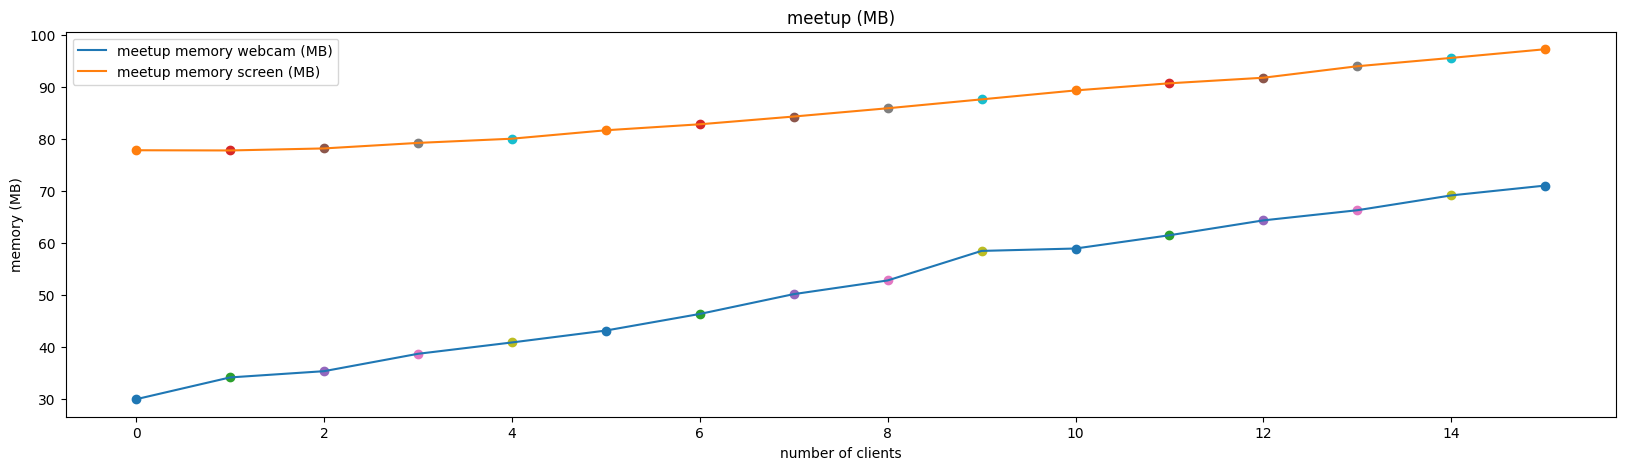

In [279]:
unit = '(MB)'

df_media_webcam = df[df['media'] == 'webcam']
df_media_webcam.reset_index(drop=True, inplace=True)
df_media_webcam['index'] = df_media_webcam.index
df_media_screen = df[df['media'] == 'screen']
df_media_screen.reset_index(drop=True, inplace=True)
df_media_screen['index'] = df_media_screen.index

plt.title(f'meetup {unit}')
plt.xlabel("number of clients")
plt.ylabel("memory (MB)")

plt.plot(df_media_webcam['index'], df_media_webcam['memory'],
            label=f'meetup memory webcam {unit}')
plt.plot(df_media_screen['index'], df_media_screen['memory'],
            label=f'meetup memory screen {unit}')


clients = df_media_webcam['client']
for idx, x in enumerate(clients):
    plt.scatter(df_media_webcam['index'][idx], df_media_webcam['memory'][idx])
    plt.scatter(df_media_screen['index'][idx], df_media_screen['memory'][idx])

plt.legend()
plt.gcf().set_size_inches(20, 5)
plt.savefig(f'./plot_journal/server_memory.jpg')
plt.show()

#### CPU

/tmp/ipykernel_553911/2689929612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_webcam['index'] = df_media_webcam.index
/tmp/ipykernel_553911/2689929612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_screen['index'] = df_media_screen.index


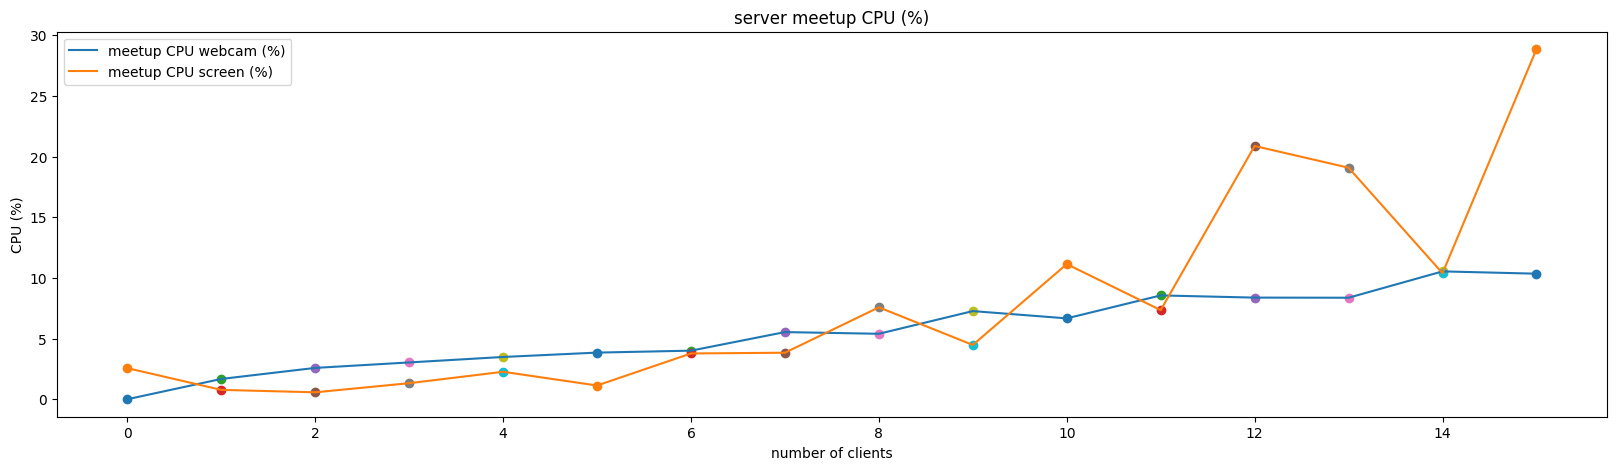

In [280]:
df_media_webcam = df[df['media'] == 'webcam']
df_media_screen = df[df['media'] == 'screen']
df_media_webcam.reset_index(drop=True, inplace=True)
df_media_screen.reset_index(drop=True, inplace=True)
df_media_webcam['index'] = df_media_webcam.index
df_media_screen['index'] = df_media_screen.index

plt.title(f'server meetup CPU (%)')
plt.xlabel("number of clients")
plt.ylabel("CPU (%)")

plt.plot(df_media_webcam['index'], df_media_webcam['cpu'], label=f'meetup CPU webcam (%)')
plt.plot(df_media_screen['index'], df_media_screen['cpu'], label=f'meetup CPU screen (%)')

clients = df_media_webcam['client']
for idx, x in enumerate(clients):
    plt.scatter(df_media_webcam['index'][idx], df_media_webcam['cpu'][idx])
    plt.scatter(df_media_screen['index'][idx], df_media_screen['cpu'][idx])

plt.legend()
plt.gcf().set_size_inches(20, 5)
plt.savefig(f'./plot_journal/server_cpu.jpg')
plt.show()

#### Throughput (download and upload) in Server

/tmp/ipykernel_553911/3127421754.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_webcam['index'] = df_media_webcam.index
/tmp/ipykernel_553911/3127421754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_screen['index'] = df_media_screen.index


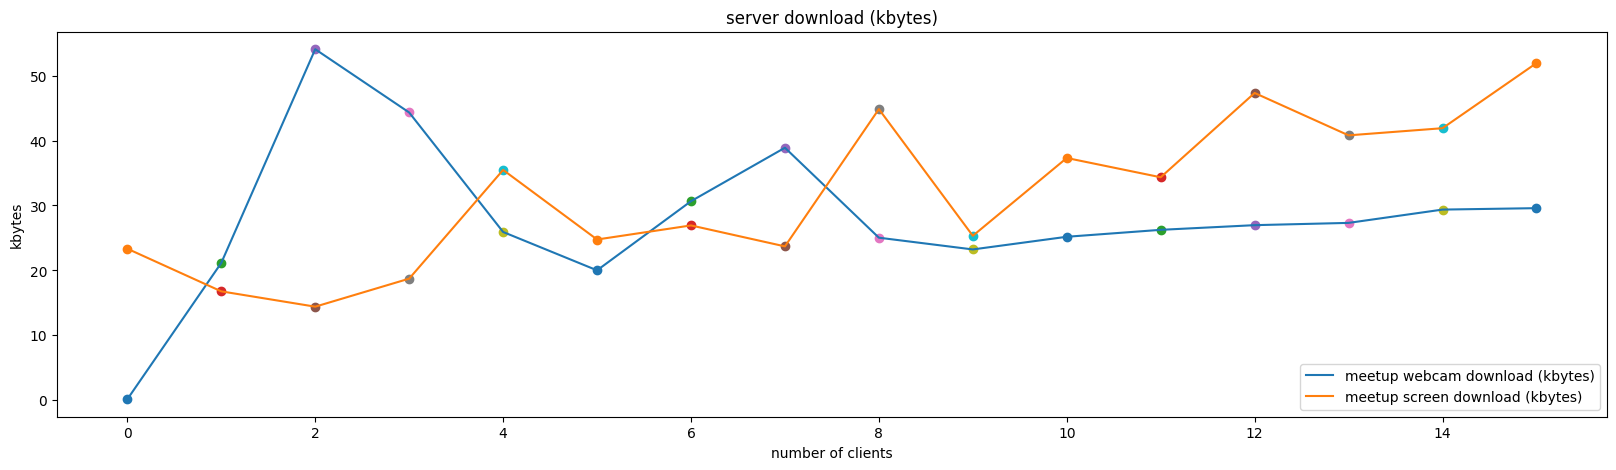

/tmp/ipykernel_553911/3127421754.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_webcam['index'] = df_media_webcam.index
/tmp/ipykernel_553911/3127421754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_screen['index'] = df_media_screen.index


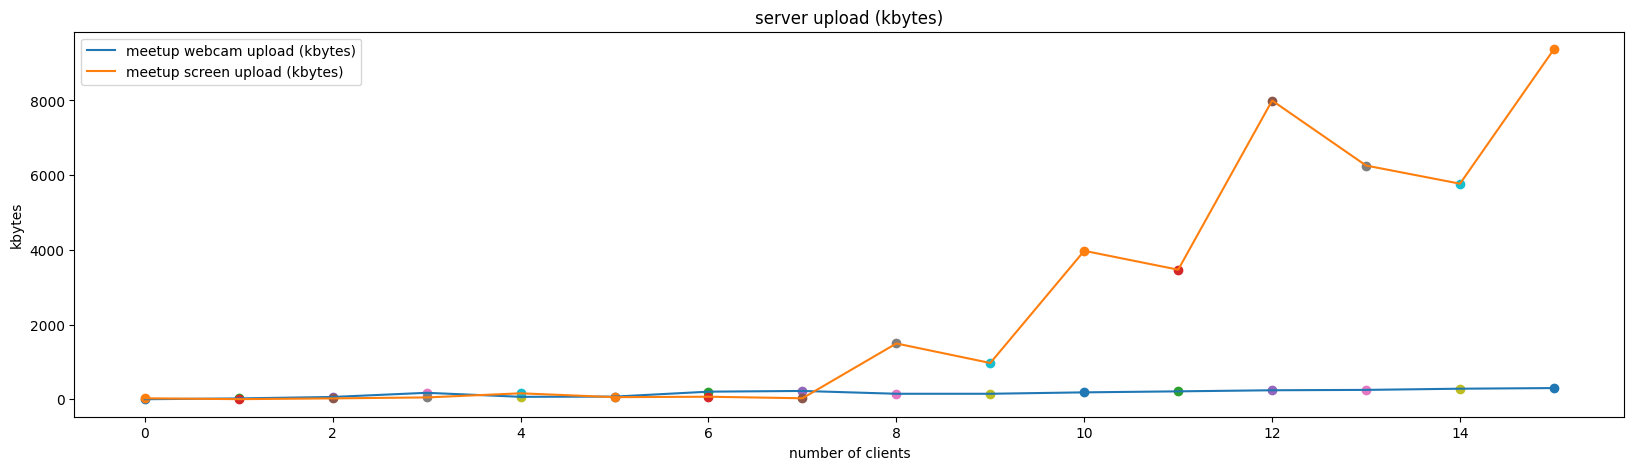

In [281]:
for bt in ['download (kbytes)', 'upload (kbytes)']:
    df_media_webcam = df[(df['media'] == 'webcam')]
    df_media_screen = df[(df['media'] == 'screen')]
    df_media_webcam.reset_index(drop=True, inplace=True)
    df_media_screen.reset_index(drop=True, inplace=True)
    df_media_webcam['index'] = df_media_webcam.index
    df_media_screen['index'] = df_media_screen.index


    plt.title(f'server {bt}')
    plt.xlabel("number of clients")
    plt.ylabel("kbytes")

    plt.plot(df_media_webcam['index'], df_media_webcam[bt], label=f'meetup webcam {bt}')
    plt.plot(df_media_screen['index'], df_media_screen[bt], label=f'meetup screen {bt}')

    clients = df_media_webcam['client']
    for idx, x in enumerate(clients):
        plt.scatter(df_media_webcam['index'][idx], df_media_webcam[bt][idx])
        plt.scatter(df_media_screen['index'][idx], df_media_screen[bt][idx])

    plt.legend()
    plt.gcf().set_size_inches(20, 5)
    plt.savefig(f'./plot_journal/server_{bt}.jpg')

    plt.show()